In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pickle
import functools
import gc
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
import lightgbm as lgb

# 1. Members_v3 file 

In [2]:
df = pd.read_csv("members_v3.csv")
df

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915
...,...,...,...,...,...,...
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,1,0,NaN,7,20151020
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,1,0,NaN,7,20151020
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,15,26,female,4,20151020
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,1,0,NaN,4,20151020


# 1.1 Univariant Analysis

### Null value analysis

In [3]:
df.isnull().sum()

msno                            0
city                            0
bd                              0
gender                    4429505
registered_via                  0
registration_init_time          0
dtype: int64

### we can see that there is no missing values except gender .
### But i decided to keep that nan value as another category for our first model.

### 1.1.1 Univariant analysis for City 

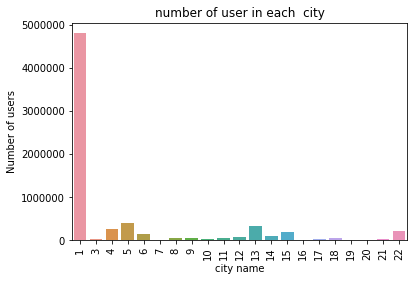

In [4]:
sns.countplot(x='city', data=df)
plt.title('number of user in each  city')
plt.ylabel('Number of users')
plt.xlabel('city name')
plt.xticks(rotation = 90)
plt.show();

#### most of the users where from city 1 and second highest number  of users lives in city 5.
####  city 4,6,14,13,15,22 has huge nuber of users after city one and 5 .
#### it seams the music app is most popular in the city 1  than other city 

### 1.1.2 Univaiant analysis for bd

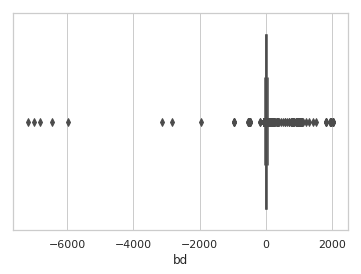

In [5]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df['bd'])

We can see that there are some out liers whoes values are very higher than or lower than normal human beeing age.
so we can replace them with -1

In [6]:
for i in range(11):
    print("percentile {} is {}".format(i*10,df.bd.quantile(i/10)))
print(df.bd.quantile(.999))


percentile 0 is -7168.0
percentile 10 is 0.0
percentile 20 is 0.0
percentile 30 is 0.0
percentile 40 is 0.0
percentile 50 is 0.0
percentile 60 is 0.0
percentile 70 is 18.0
percentile 80 is 25.0
percentile 90 is 33.0
percentile 100 is 2016.0
94.0


In [7]:
df.bd.quantile(.9988)

87.0

### we can clearly see that data at 99.88 percentile is 87.
### which means 99.88 % of the users age is lesser than 87 So we can relace whose age is more than the 87 to -1.
### same like we see that above the 10 percentile value for users is 0 which means there is no such age but we will remove all the ages that is below 0 and replace it with -1

In [8]:
# most of the people liew between 10 to 82 we can conider this as threshold
from tqdm import tqdm
df['bd'] = list(map(lambda x: -1 if x<10 or x>85 else x,tqdm(df.bd)))

100%|██████████| 6769473/6769473 [00:03<00:00, 2082985.67it/s]


In [9]:
for i in range(11):
    print("percentile {} is {}".format(i*10,df.bd.quantile(i/10)))
print(df.bd.quantile(.999))

percentile 0 is -1.0
percentile 10 is -1.0
percentile 20 is -1.0
percentile 30 is -1.0
percentile 40 is -1.0
percentile 50 is -1.0
percentile 60 is -1.0
percentile 70 is 18.0
percentile 80 is 25.0
percentile 90 is 33.0
percentile 100 is 85.0
67.0


In [10]:
# most of the people liew between 10 to 82 we can conider this as threshold
from tqdm import tqdm
df['bd'] = list(map(lambda x: -1 if x<10 or x>85 else x,tqdm(df.bd)))
#df_test['bd'] = list(map(lambda x: -1 if x<10 or x>85 else x,tqdm(df_test.bd)))
#df.apply(lambda x: -1 if x[2]<10 and x[2]>85 else x[2],axis=1)

for i in range(11):
    print("percentile {} is {}".format(i*10,df.bd.quantile(i/10)))
print(df.bd.quantile(.999))

100%|██████████| 6769473/6769473 [00:03<00:00, 2073832.44it/s]


percentile 0 is -1.0
percentile 10 is -1.0
percentile 20 is -1.0
percentile 30 is -1.0
percentile 40 is -1.0
percentile 50 is -1.0
percentile 60 is -1.0
percentile 70 is 18.0
percentile 80 is 25.0
percentile 90 is 33.0
percentile 100 is 85.0
67.0


### 1.1.3 Univariant analysis for gender

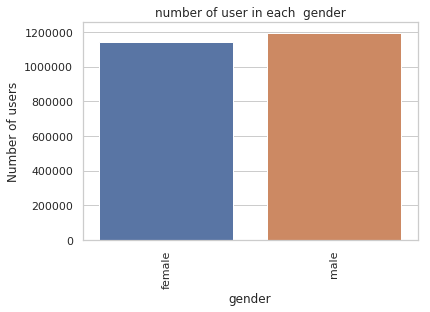

In [11]:
sns.countplot(x='gender', data=df)
plt.title('number of user in each  gender')
plt.ylabel('Number of users')
plt.xlabel('gender')
plt.xticks(rotation = 90)
plt.show();

#### we can see that in both gender we have almost equal number of users
#### we also saw that gender feature have lot of missing values.
#### we will be considering that Nan values as third category.

### 1.1.4 Univariant Analysis for registered_via

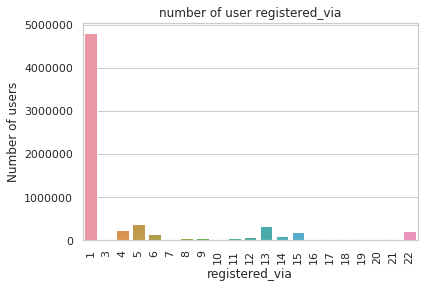

In [12]:
sns.countplot(x='city', data=df)
plt.title('number of user registered_via')
plt.ylabel('Number of users')
plt.xlabel('registered_via')
plt.xticks(rotation = 90)
plt.show();

#### Most of the users where mmade payment via method 1.
#### the second highest payment methods that used is 4,5,6,13,15,22.
#### remaing methods not used that frequently

### 1.1.5 Univariant Analysis for registration_init_time

In [13]:
df['registration_init_time'].min()

20040326

In [14]:
df['registration_init_time'].max()

20170429

# 1.2 Bi-Variant Analysis for Membership file

In [15]:
df_train = pd.read_csv("train_v2_final_201701.csv")
df_train

,msno,is_churn
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0
...,...,...
976415,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,0
976416,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,1
976417,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,0
976418,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,0


In [16]:
pd.merge(df_train,df,on='msno')

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,0,6,22,female,3,20121224
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,1,-1,NaN,7,20140608
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0,15,26,male,9,20101118
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0,1,-1,NaN,7,20140927
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0,18,21,male,7,20160315
...,...,...,...,...,...,...,...
864547,zzxqpgPX1epGyR3SVRKb3XitWdt+JqDURxV5ea1D7Cg=,0,4,19,male,9,20100704
864548,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,0,5,31,male,3,20150430
864549,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,1,9,-1,NaN,7,20130515
864550,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,0,4,48,female,9,20140611


In [17]:
976420-864552 
# we can clearly see that we did not have data for 111868 in train set.
# but we can include this users also and we have to dio certain imutaion.
# for age feature we can impute them with nan.
# for city,gender,registed_via any way we are considering nan as as one category

111868

In [18]:
df_train =  pd.merge(df_train,df,on='msno',how='left')
df_train

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,0,6.0,22.0,female,3.0,20121224.0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,1.0,-1.0,NaN,7.0,20140608.0
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0,15.0,26.0,male,9.0,20101118.0
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0,1.0,-1.0,NaN,7.0,20140927.0
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0,18.0,21.0,male,7.0,20160315.0
...,...,...,...,...,...,...,...
976415,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,0,5.0,31.0,male,3.0,20150430.0
976416,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,1,9.0,-1.0,NaN,7.0,20130515.0
976417,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,0,4.0,48.0,female,9.0,20140611.0
976418,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,0,1.0,-1.0,NaN,7.0,20120416.0


In [19]:
df_train['bd'] = df_train['bd'].fillna(-1)

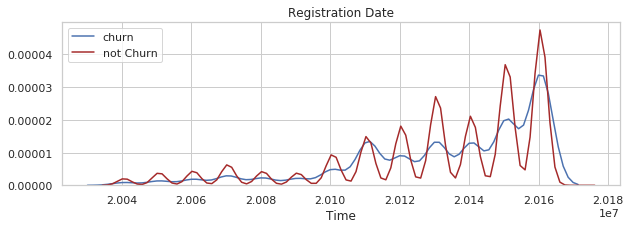

In [20]:
plt.figure(figsize=(10,3))
sns.distplot(df_train[df_train['is_churn']==1]['registration_init_time'].dropna(), hist=False, label="churn")
sns.distplot(df_train[df_train['is_churn']==0]['registration_init_time'].dropna(), hist=False, label="not Churn",
             color='brown')
plt.title('Registration Date')
plt.xlabel('Time')
plt.legend()
plt.show()

### we cansee that if flow with some interval.
### after a ever peak it has some decay as it follows time trend.
### the number of not churn users were comparatively increasing every year than churn users.


In [22]:
df_train[['msno','registration_init_time']].sort_values(by=['registration_init_time'],ascending=[False])

,msno,registration_init_time
748979,l28GXPDyc81yt4ZR7v6G6OeA9acEwLNFm5u0IgExML0=,20170326.0
231343,D9BbvAVT6NH8vrQFVqYgiSeVKnLbDztVGlZc8hvYmd8=,20170321.0
178128,9enC5ob2jbo0ydHtozG1HX6Rg8AgYJaLKJq4vkjhXNQ=,20170312.0
74431,2rS+lHK5d9cvpqGgNDy7T3OxaFvtQFXkgDd1yP+ld4s=,20170301.0
841220,r6uR0oSpryw/nlnLzc9BSLV6fNDYwwfHSpZmtTPVOEo=,20170122.0
...,...,...
976372,zzluOt3F7bCPVG8ZRgGbGNYVSICKW1xIjx4PpepeK2s=,NaN
976399,zzuiTQN9MP4dT+mVTYuaFGeQwum5iIkUW56LyzPi4gA=,NaN
976403,zzvZ4AqXwz9Yh2nyExvdWL3YxRVvFLLotZaLXJL6Hik=,NaN
976413,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,NaN


# 2. Transaction File

In [3]:
df_train = pd.read_csv("transactions.csv")
df_train = pd.merge(df_train,pd.read_csv("train_jan_expire.csv").reset_index(drop=True))
df_train

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,Unnamed: 0,is_churn
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0,565333,0
1,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20151031,20151201,0,565333,0
2,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150630,20150801,0,565333,0
3,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150228,20150401,0,565333,0
4,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20161130,20170101,0,565333,0
...,...,...,...,...,...,...,...,...,...,...,...
15985829,bVJyBA1GgAZOypf9FnizDs/ItORDv8kzPI0qJZ9h2Rw=,38,360,1200,1200,0,20160127,20170121,0,604069,1
15985830,TJ1+ewfmlf4X8HQLGdB4Ar3nhc1xbp/15Bvv2YVStFE=,38,30,100,100,0,20161229,20170128,0,478859,1
15985831,B1dHFeWoEB0jktuHFKOOTLoe6A/W59UTdNvk6d0X+WM=,38,30,149,149,0,20161211,20170110,0,199772,1
15985832,ae8HM6SndKHGUzakYekPWfwxhqdluD440/Dzftdy4ck=,32,410,1788,1788,0,20151118,20170111,0,591123,1


# 2.1 Univariant Analysis

### Null Value Analysis

In [16]:
df_train.isnull().sum()

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
Unnamed: 0                0
is_churn                  0
dtype: int64

### we can see that as of now we dont have any null values

### 2.1.1 Univariant analysis for payment_method_id 

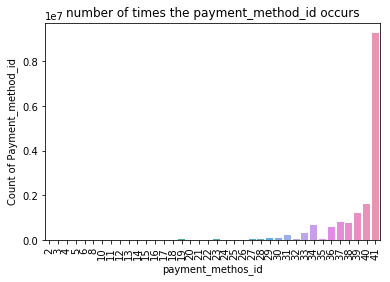

In [7]:
sns.countplot(x='payment_method_id', data=df_train)
plt.title('number of times the payment_method_id occurs')
plt.ylabel('Count of Payment_method_id')
plt.xlabel('payment_methos_id')
plt.xticks(rotation = 90)
plt.show();

### we can see thatmajority users in train data had done payment through payment_method_id = 41

### the payment method id from 33 to 40 has second highest occurance.


### 2.1.2 Univariant analysis of payment_plan_days

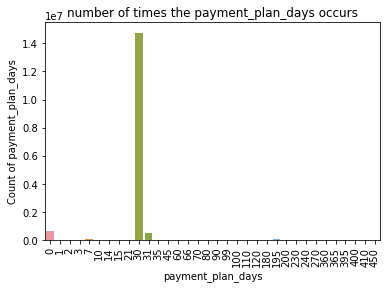

In [10]:
sns.countplot(x='payment_plan_days', data=df_train)
plt.title('number of times the payment_plan_days occurs')
plt.ylabel('Count of payment_plan_days')
plt.xlabel('payment_plan_days')
plt.xticks(rotation = 90)
plt.show();

### most of the people where subscribed for 30 days plan i.e., Monthly subcription there second highest chance for 31 days 

### 2.1.3 Univriant Analysis for plan_list_price

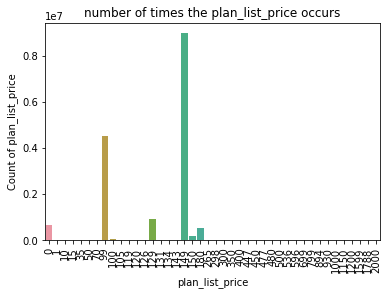

In [11]:
sns.countplot(x='plan_list_price', data=df_train)
plt.title('number of times the plan_list_price occurs')
plt.ylabel('Count of plan_list_price')
plt.xlabel('plan_list_price')
plt.xticks(rotation = 90)
plt.show();

### We Know most of the people where did subscription for monthly plan so here we has 149 is highest count. second highest is 99 even it is monthly subscripion rate.

### 2.1.4 Univariant Analysis for actual_amount_paid

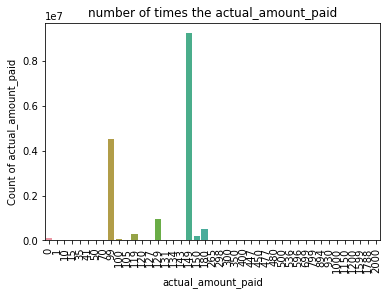

In [12]:
sns.countplot(x='actual_amount_paid', data=df_train)
plt.title('number of times the actual_amount_paid')
plt.ylabel('Count of actual_amount_paid')
plt.xlabel('actual_amount_paid')
plt.xticks(rotation = 90)
plt.show();

### we can see both plan_list price and actual list price too have some conclusion about discount both looks very similar only so mostly there are very less number of times eople got discount.

### 2.1.5 Univariant analysis of is_auto_renew

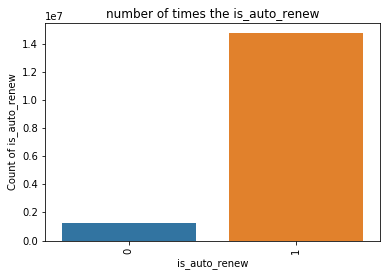

In [14]:
sns.countplot(x='is_auto_renew', data=df_train)
plt.title('number of times the is_auto_renew')
plt.ylabel('Count of is_auto_renew')
plt.xlabel('is_auto_renew')
plt.xticks(rotation = 90)
plt.show();

### most of the people where doing payment through auto renew option
### the nuber of people who does payment manually is significantly lower

### 2.1.6 Univariant Analysis of is_cancel 

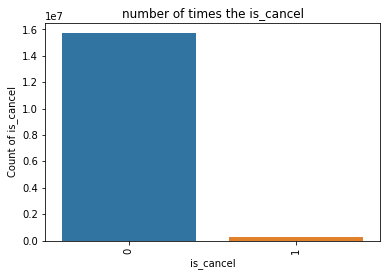

In [19]:
sns.countplot(x='is_cancel', data=df_train)
plt.title('number of times the is_cancel')
plt.ylabel('Count of is_cancel')
plt.xlabel('is_cancel')
plt.xticks(rotation = 90)
plt.show();

### there is very less chance of user cancelling a transaction. there might be a reason like user might thought to change plan.

### 2.1.7 Univariant Analysis of is_churn

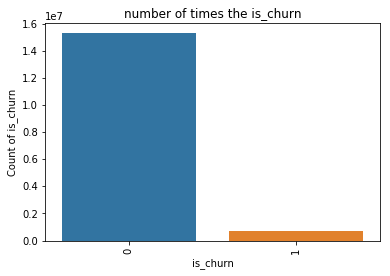

In [20]:
sns.countplot(x='is_churn', data=df_train)
plt.title('number of times the is_churn')
plt.ylabel('Count of is_churn')
plt.xlabel('is_churn')
plt.xticks(rotation = 90)
plt.show();

### We have an imbalanced data set we can see that most of the users had not churn
### only a 7-8% of users where churns once there membershifp expires

## 2.2 Bi - Variant Analysis

### 2.2.1 Bi-variant Analysis for payment_method_id

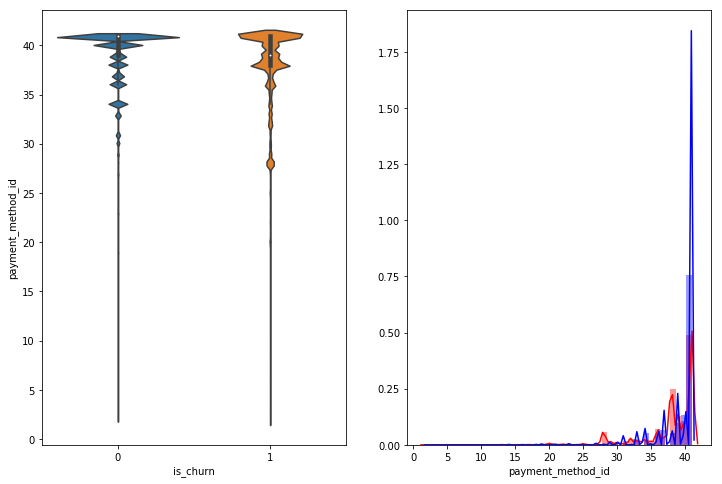

In [16]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_churn', y = 'payment_method_id', data = df_train[0:])

plt.subplot(1,2,2)
sns.distplot(df_train[df_train['is_churn'] == 1.0]['payment_method_id'][0:] , label = "1", color = 'red')
sns.distplot(df_train[df_train['is_churn'] == 0.0]['payment_method_id'][0:] , label = "0" , color = 'blue' )
plt.show()

### Most of the people who did not churn was paid through payment method id 41 and less number of people paid on another payment method id.
### but people who churn has user all athe payment method id from 25 to 41 eqaully likely number of times.

### 2.2.2 Bi-variant Analysis for payment_plan_days

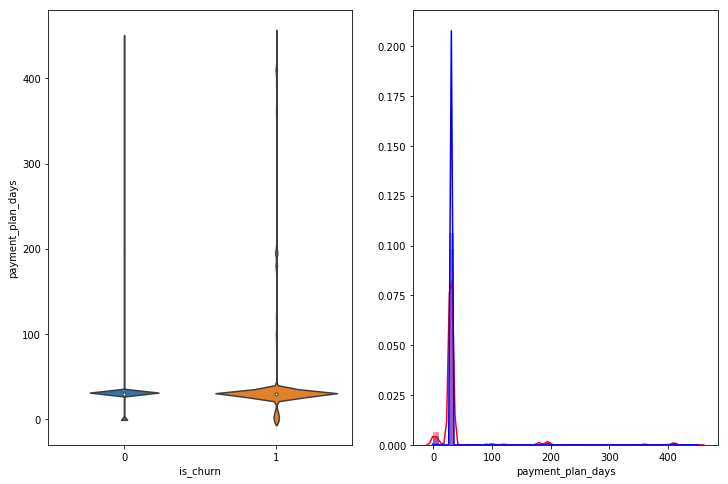

In [6]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_churn', y = 'payment_plan_days', data = df_train[0:])

plt.subplot(1,2,2)
sns.distplot(df_train[df_train['is_churn'] == 1]['payment_plan_days'][0:] , label = "1", color = 'red')
sns.distplot(df_train[df_train['is_churn'] == 0]['payment_plan_days'][0:] , label = "0" , color = 'blue' )
plt.show()

### We can see most of the subscriber who did not churn was subscrbed for 30 days plan than subscriber who churned after jan membership expires.
### We can als see thaat there are people who churned has more number of values as 0 than the user who did not churn

### 2.2.3 Bi-variant Analysis for plan_list_price

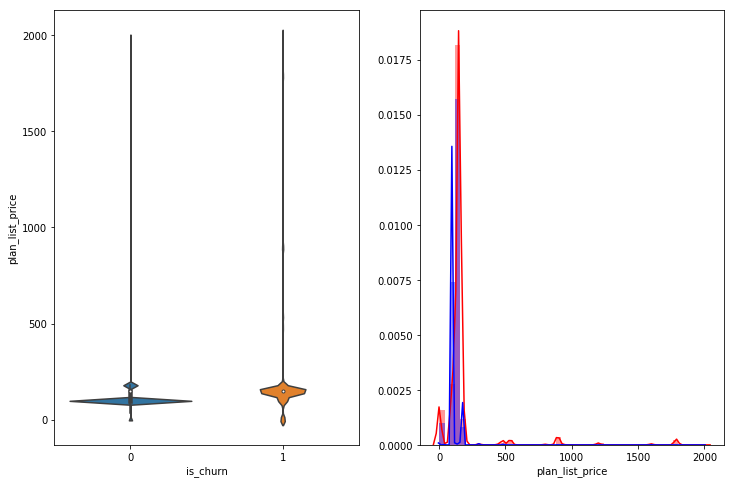

In [7]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_churn', y = 'plan_list_price', data = df_train[0:])

plt.subplot(1,2,2)
sns.distplot(df_train[df_train['is_churn'] == 1]['plan_list_price'][0:] , label = "1", color = 'red')
sns.distplot(df_train[df_train['is_churn'] == 0]['plan_list_price'][0:] , label = "0" , color = 'blue' )
plt.show()

### the violin plot shows very clearly that user who churned after jan membership had plan_list price more than user who did not churned.
### So there is possibility that user churned because they pays more tha others.

### 2.2.4 Bi-variant Analysis for actual_amount_paid

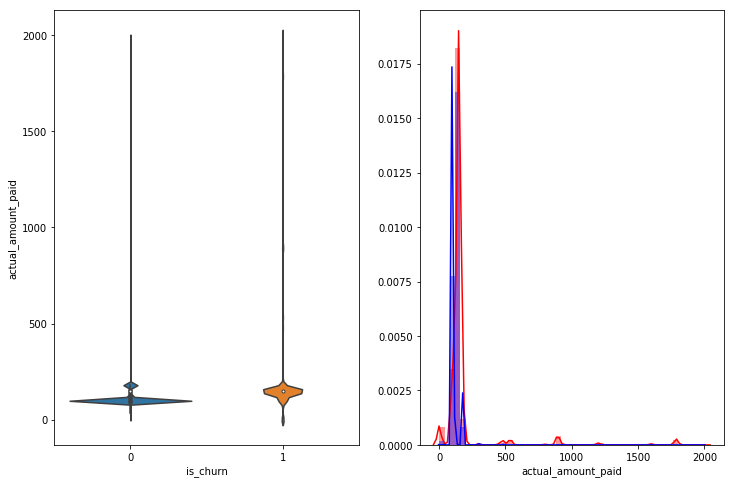

In [8]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_churn', y = 'actual_amount_paid', data = df_train[0:])

plt.subplot(1,2,2)
sns.distplot(df_train[df_train['is_churn'] == 1]['actual_amount_paid'][0:] , label = "1", color = 'red')
sns.distplot(df_train[df_train['is_churn'] == 0]['actual_amount_paid'][0:] , label = "0" , color = 'blue' )
plt.show()

### The plot remains same for both plan_list_price and actual _amount paid. It shows there is very less probabilitiy of getting discount

### 2.2.5 Bi-variant Analysis for is_auto_renew

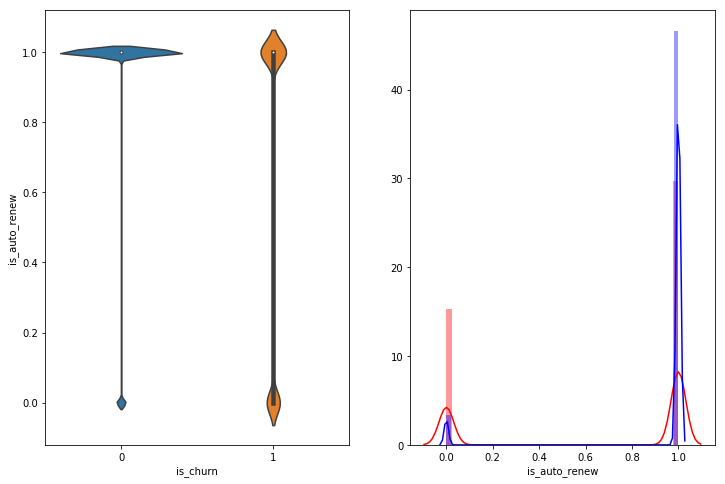

In [9]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_churn', y = 'is_auto_renew', data = df_train[0:])

plt.subplot(1,2,2)
sns.distplot(df_train[df_train['is_churn'] == 1]['is_auto_renew'][0:] , label = "1", color = 'red')
sns.distplot(df_train[df_train['is_churn'] == 0]['is_auto_renew'][0:] , label = "0" , color = 'blue' )
plt.show()

### The subscriber who churned after Jan Membership expire date paid using manual payment Highly than than the not churned subscriber.
### The Subscriber who did not churn after Jan paid mostly with auto payment.

### 2.2.6 Bi-variant Analysis for transaction_date

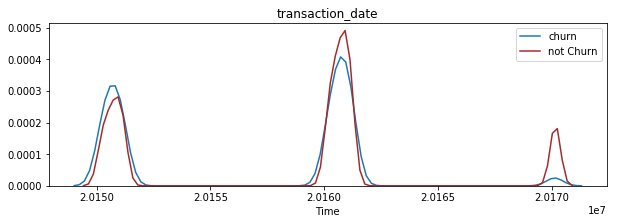

In [14]:
plt.figure(figsize=(10,3))
sns.distplot(df_train[df_train['is_churn']==1]['transaction_date'].dropna(), hist=False, label="churn")
sns.distplot(df_train[df_train['is_churn']==0]['transaction_date'].dropna(), hist=False, label="not Churn",
             color='brown')
plt.title('transaction_date')
plt.xlabel('Time')
plt.legend()
plt.show()

### The figure Clearl shows that every year the most of the people does transaction at starting of he year.
### after 2015 the number of user who churned had increase more than user who did not churn.
### at the same time the number of subscribers also increased.

### 2.2.7 Bi-variant Analysis for membership_expire_date

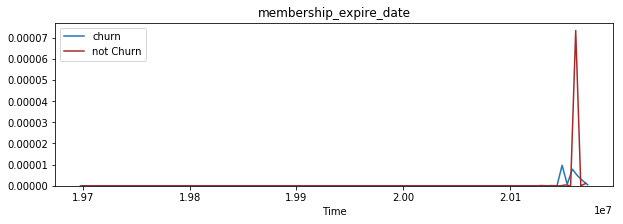

In [15]:
plt.figure(figsize=(10,3))
sns.distplot(df_train[df_train['is_churn']==1]['membership_expire_date'].dropna(), hist=False, label="churn")
sns.distplot(df_train[df_train['is_churn']==0]['membership_expire_date'].dropna(), hist=False, label="not Churn",
             color='brown')
plt.title('membership_expire_date')
plt.xlabel('Time')
plt.legend()
plt.show()

### as we took people whose membership expires in 2017 jan we have only membership expire date at jan 2017

### 2.2.8 Bi-variant Analysis for is_cancel

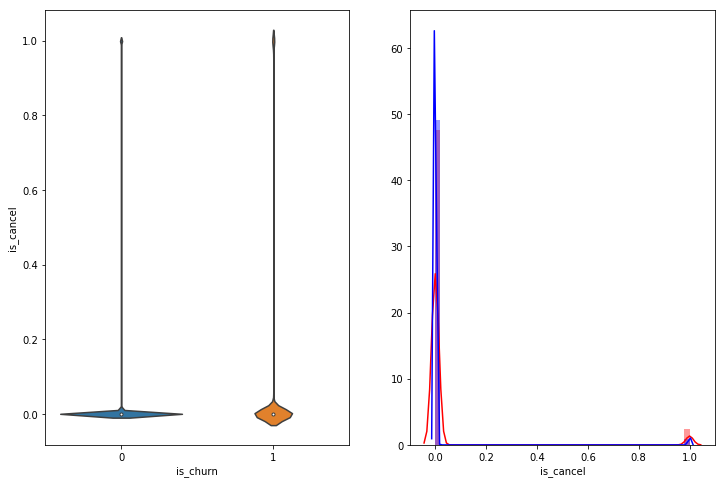

In [12]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_churn', y = 'is_cancel', data = df_train[0:])

plt.subplot(1,2,2)
sns.distplot(df_train[df_train['is_churn'] == 1]['is_cancel'][0:] , label = "1", color = 'red')
sns.distplot(df_train[df_train['is_churn'] == 0]['is_cancel'][0:] , label = "0" , color = 'blue' )
plt.show()

### mostly the user who did not churn only cancelled a transaction more number of times than churned subscriber
### So we can say that if user canceled a transaction it doesnt mean he is going to be churned
### May be he planed to go for another transaction for some other better plan
### so transaction cancel has no obvious link with churned people.

# 3. Label Generate for Train and test data

In [2]:
df = pd.read_csv("transactions.csv")

In [3]:
def generate_label(df,date,trans_date):
    """
    Objective: generate label for train and test test.
    
    Input: Dataframe,Memership Expire date, Transaction date
    
    OutPut: Dataframe which has msno and ischurn
    """
    
    df_jan = df[df['membership_expire_date']<=date[1]]
    df_jan = df_jan[df_jan['membership_expire_date']>=date[0]]
    df_jan = df_jan[df_jan['transaction_date']<=trans_date]
    df_jan = df_jan[df_jan['is_cancel'] == 0]
    df_jan = df_jan.sort_values(by=['msno','transaction_date'],ascending=[True,True])
    df_jan =df_jan.groupby('msno').tail(1)
    df_jan = df_jan.drop_duplicates(subset=['msno'], keep="first", inplace=False)
    
    print("size of jan expire data frame",df_jan.shape)
    
    df_jan_after = df[df['membership_expire_date']>date[1]]
    df_jan_after = df_jan_after[df_jan_after['transaction_date']>trans_date]
    df_jan_after = df_jan_after[df_jan_after['is_cancel']==0]
    df_jan_after = df_jan_after.sort_values(by=['msno','transaction_date'],ascending=[True,True])
    df_jan =df_jan.groupby('msno').head(1)
    df_jan_After = df_jan_after.drop_duplicates(subset=['msno'], keep="first", inplace=False)
    print("size of the the user whos expire date is after jan ",df_jan_after.shape)
    
    df_jan_after_min = df_jan_after[df_jan_after.groupby(['msno'])['transaction_date'].transform(min) == df_jan_after['transaction_date']]
    df_jan_After_min = df_jan_after_min.sort_values(by=['msno','transaction_date'],ascending=[True,True])
    df_jan_After_min = df_jan_after_min.drop_duplicates(subset=['msno'], keep="first", inplace=False)
    print("First transactions after jan expire shape=",df_jan_After_min.shape)
    
    final_one = pd.merge(df_jan[['msno','membership_expire_date']],df_jan_after_min[['msno','transaction_date']],on = 'msno',how='left')
    final_one['transaction_date'] = final_one.transaction_date.fillna(date[1]+197).astype(int)
    final_one = final_one.drop_duplicates(subset=['msno'], keep="first", inplace=False)
    print(" After Merging Both Jan expire and next traansaction shape =",final_one.shape)
    
    final_one['is_churn'] = final_one.apply(lambda x:(abs(datetime.datetime.strptime(str(x[1]), '%Y%m%d')-datetime.datetime.strptime(str(x[2]), '%Y%m%d')).days)>31,axis=1).astype(int)
    print("Final Train set =",final_one.shape)
    
    return final_one[['msno','is_churn']]

In [4]:
train = generate_label(df,(20170101,20170131),20161231)
test  = generate_label(df,(20170201,20170228),20170131)

size of jan expire data frame (977468, 9)
size of the the user whos expire date is after jan  (1847946, 9)
First transactions after jan expire shape= (1029852, 9)
 After Merging Both Jan expire and next traansaction shape = (977468, 3)
Final Train set = (977468, 4)
size of jan expire data frame (984122, 9)
size of the the user whos expire date is after jan  (866545, 9)
First transactions after jan expire shape= (862942, 9)
 After Merging Both Jan expire and next traansaction shape = (984122, 3)
Final Train set = (984122, 4)


In [5]:
train.to_csv("train_jan_expire.csv")
test.to_csv("test_feb_expire.csv")

# 4. Members Detail File Preprocessing and extracting Features

In [2]:
df = pd.read_csv("members_v3.csv")
df_train = pd.read_csv("user_label_201702.csv")
df_cv = pd.read_csv("user_label_201703.csv")
df_test = pd.read_csv("./data/churn_comp_refresh/sample_submission_v2.csv")

In [3]:
df.describe()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.795794e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,1.792590e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,-7.168000e+03,-1.000000e+00,2.004033e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,2.100000e+01,7.000000e+00,2.016060e+07
max,2.200000e+01,2.016000e+03,1.900000e+01,2.017043e+07


In [4]:
df.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time'],
      dtype='object')

In [5]:
# import pickle
# #################################################Encode#Categorical#Feature#####################################################

# def count_vectorizer(df_train,fea_):                                                                                          
#     """                                                                                                                               
#     Objective : Convert the given feature into vector
#     Input : Train dataframe, Test Data Frame, Feature namea
#     Output : Vectorized train and test data
#     """
#     vectorizer = CountVectorizer( lowercase=False, binary=True, token_pattern = r"(?u)\b\w+\b")
#     vectorizer.fit(list(map(str, df_train[fea_].values.astype(int)))) #convert integer values to string
#     print("The features in {} = ".format(fea_),end='')
#     print(vectorizer.get_feature_names())
#     print(len(vectorizer.get_feature_names()))
#     return vectorizer

# train = pd.merge(df_train.reset_index(drop=True),df,on='msno',how='left')
# #city
# city_vector = count_vectorizer(train,'city')
# #gender
# vectorizer = CountVectorizer( lowercase=False, binary=True, token_pattern = r"(?u)\b\w+\b")
# vectorizer.fit(list(map(str, train['gender'].values))) #convert integer values to string
# print("The features in {} = ".format('gender'),end='')
# print(vectorizer.get_feature_names())
# print(len(vectorizer.get_feature_names()))
# gender_vector = vectorizer
# #reg_via
# registered_via_vector = count_vectorizer(train,'registered_via')

# mem_vector = (city_vector,gender_vector,registered_via_vector)
# pickle.dump(mem_vector,open("member.pickle","wb"))
# # we are considering nan as a another category in every feature except bd

The features in city = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '3', '4', '5', '6', '7', '8', '9', '9223372036854775808']
22
The features in gender = ['female', 'male', 'nan']
3
The features in registered_via = ['13', '3', '4', '7', '9', '9223372036854775808']
6


In [6]:
############################preprocessing member file##########################################################
def preprocess_member(df,msno_file):
    """
    Objective: Preprocess the membes detail file
    
    Input: Membership data frame, train or test data frame
    
    OutPut: preprocessed members deetail
    """
    data = pd.merge(msno_file.reset_index(drop=True),df,on='msno',how='left')
    (city_vector,gender_vector,registered_via_vector) = pickle.load(open("member.pickle","rb"))
    #1. city
    data_city = city_vector.transform(list(map(str,data['city'].values.astype(int))))
    #2. bd
    #fill the nan value with -1 in age data
    data['bd'] = data['bd'].fillna(-1)
    # remove all the ages greater than 85 and lesser than 10 in train data
    data['bd'] = list(map(lambda x: -1 if x<10 or x>85 else x,data.bd))
    #3. gender
    data_gender = gender_vector.transform(list(map(str,data['gender'].values)))
    #4. registered_via
    data_registered_via = registered_via_vector.transform(list(map(str,data['registered_via'].values.astype(int))))
    #5. Registration init time 
    data['registration_init_time'] = data['registration_init_time'].fillna(-1)
    #stacking
    data = np.hstack((data[['bd','registration_init_time']].to_numpy(),data_city.todense(),data_gender.todense(),data_registered_via.todense()))   
    return data

In [8]:
Train = preprocess_member(df,df_train)
np.save("Final/train_member",Train)

In [9]:
cv = preprocess_member(df,df_cv)
np.save("Final/cv_member.npy",cv)

In [10]:
Test = preprocess_member(df,df_test)
np.save("Final/test_member.npy",Test)

In [11]:
print(Train.shape,cv.shape,Test.shape)

(879537, 33) (886500, 33) (907471, 33)


# 5. Log file Preprocessing

In [2]:
import pandas as pd
from tqdm import tqdm
import functools
import gc

In [3]:
# #https://github.com/tprateek287/churn-prediction/blob/master/preprocessing_scripts/baseline_dataset_pre/user_logs_baseline.ipynb
# #https://github.com/tprateek287/churn-prediction/blob/master/preprocessing_scripts/baseline_dataset_pre/
# #create small small chunk files to preprocess as we could not load complete file into memory
# #creating chunks of df
# iterable_df = pd.read_csv('user_logs.csv', low_memory = False, iterator = True, chunksize = 40000000)
# count=0
# for df in tqdm(iterable_df,total = 10):
#     #going to select the last 12 months data that we are going to use from huge dataset and export then as csv files.
#     #so later we can preprocess the data easily
#         df.to_csv("chunk/user_logs_chunk_{}.csv".format(count),index=False)
#         count+=1
#         del df
#         gc.collect()
    

In [4]:
def sum_feature(files,msno_file,name,last_day,month,days):
    f = [files[:5],files[5:]]
    merge = []
    for c in range(0,2):
        #get features from log files from 2016
        merge_files = []
        for i in tqdm(features[:-1]):
            #load all the files we made from last iteration. But only loading pariticular columns to avoid memor constraints
            df = pd.concat([pd.read_csv(f,usecols=['msno',i,'date']) for f in f[c]])
            #to avoid leakage problem we only slecing data untill 2016
            df = pd.merge(pd.read_csv(msno_file).drop(['Unnamed: 0','is_churn'],axis=1),df,on='msno',how='left')
            gc.collect()
            df=df[df['date'].le(last_day)][['msno',i]]
            #creating sum,mean,std of a msno feature
            df=df.groupby('msno').agg({i:['sum','mean']})
            #rename the column name as ater group and aggregation names might be diffrent
            df.columns = df.columns = ["_".join(x) for x in df.columns.ravel()]
            #export our feature as csv
            df.to_csv('Processed/'+str(i)+'_'+str(c)+'_'+name+".csv")
            #clear the ram for next iteration
            merge_files.append('Processed/'+str(i)+'_'+str(c)+'_'+name+".csv")
            del df
            gc.collect()
        ##################################################################################################################
        #load all the files we made from last iteration. But only loading pariticular columns to avoid memory  constraints
        df = pd.concat([pd.read_csv(f,usecols=['msno','total_secs','date']) for f in f[c]])
        #to avoid leakage problem we only slecing data untill 2016
        df = pd.merge(pd.read_csv(msno_file).drop(['Unnamed: 0'],axis=1),df,on='msno',how='left')
        gc.collect()
        df=df[df['date'].le(last_day)][['msno','total_secs']]
        #creating sum,mean,std of a msno feature
        df=df.groupby('msno').agg({'total_secs':['sum','mean','count']})
        #rename the column name as ater group and aggregation names might be diffrent
        df.columns = df.columns = ["_".join(x) for x in df.columns.ravel()]
        #export our feature as csv
        df.to_csv('Processed/total_secs_'+str(c)+'_'+name+".csv")
        merge_files.append('Processed/total_secs_'+str(c)+'_'+name+".csv")
        #clear the ram for next iteration
        del df
        gc.collect()
        merge.append(merge_files)
    final_merge = []
    for i in range(len(features)):
        df = pd.concat([pd.read_csv(f[i]).rename(columns = {'msno_':'msno'}) for f in merge])
        val =dict()
        for j in list(df.columns):
            if 'sum' in j or 'count' in j:
                val[j]=['sum']
            elif 'mean' in j:
                val[j]=['mean']
        df = df.groupby('msno').agg(val)
        df.columns = df.columns = [x[0] for x in df.columns.ravel()]
        df = df.rename(columns = {'msno_':'msno'})
        df.to_csv('Processed/'+features[i]+'_{}.csv'.format(name))
        final_merge.append('Processed/'+features[i]+'_{}.csv'.format(name))
    data_frames = [pd.read_csv(msno_file).drop(['Unnamed: 0','is_churn'],axis=1)]
    data_frames += [pd.read_csv(f) for f in final_merge]
    df_merged = functools.reduce(lambda  left,right: pd.merge(left,right,on=['msno'],how='left'), data_frames)
    df_merged.to_csv("Processed/all_log_{}.csv".format(name))
    del df_merged
    gc.collect()

In [5]:
def last_month_features(files,msno_file,name,date,f_name):
    #sum_feature(files,msno_file,name,last_day,date,days)
    #last date features from log file
    merge_files = []
    for i in tqdm(features[:-1]):
        #load all the files we made from last iteration. But only loading pariticular columns to avoid memor constraints
        temp = []
        for f in files:
            df = pd.read_csv(f,usecols=['msno',i,'date'])
            df = df[df['date'].between(date[0],date[1])][['msno',i]]
            temp.append(df)
            gc.collect()
        df = pd.concat(temp)
        df = pd.merge(pd.read_csv(msno_file).drop(['Unnamed: 0','is_churn'],axis=1),df,on='msno',how='left')
        #creating sum,mean,std of a msno feature
        df=df.groupby('msno').agg({i:['sum','mean','std']}).reset_index()
        #rename the column name as ater group and aggregation names might be diffrent
        df.columns = df.columns = ["_".join(x) for x in df.columns.ravel()]
        df.columns = df.columns = [f_name+"_"+x for x in df.columns]
        df = df.rename(columns = {f_name+"_msno_":'msno'})
        #export our feature as csv
        df.to_csv('Processed/'+f_name+'_'+str(i)+'_'+name+".csv")
        merge_files.append('Processed/'+f_name+'_'+str(i)+'_'+name+".csv")
        #clear the ram for next iteration
        del df
        gc.collect()    

    #load all the files we made from last iteration. But only loading pariticular columns to avoid memor constraints
    temp = []
    for f in files:
        df = pd.read_csv(f,usecols=['msno','total_secs','date'])
        df = df[df['date'].between(date[0],date[1])][['msno','total_secs']]
        temp.append(df)
        gc.collect()
    df = pd.concat(temp)
    df = pd.merge(pd.read_csv(msno_file).drop(['Unnamed: 0','is_churn'],axis=1),df,on='msno',how='left')
    #creating sum,mean,std of a msno feature
    df=df.groupby('msno').agg({'total_secs':['sum','mean','std','count']}).reset_index()
    #rename the column name as ater group and aggregation names might be diffrent
    df.columns = df.columns = ["_".join(x) for x in df.columns.ravel()]
    df.columns = df.columns = [f_name+"_"+x for x in df.columns]
    df = df.rename(columns = {f_name+"_msno_":'msno'})
    #export our feature as csv
    df.to_csv('Processed/'+f_name+'_total_secs_'+name+".csv")
    merge_files.append('Processed/'+f_name+'_total_secs_'+name+".csv")
    #clear the ram for next iteration
    del df
    gc.collect()   
    data_frames = [pd.read_csv(msno_file).drop(['Unnamed: 0','is_churn'],axis=1)]
    data_frames += [pd.read_csv(f).drop(['Unnamed: 0'],axis=1) for f in merge_files]    
    df_merged = functools.reduce(lambda  left,right: pd.merge(left,right,on=['msno'],how='left'), data_frames)
    df_merged.to_csv("Processed/{}_log_{}.csv".format(f_name,name))
    del df_merged
    gc.collect()

In [6]:
def Final_day_features(files,msno_file,name,date,f_name):
    #sum_feature(files,msno_file,name,last_day,date,days)
    #last date features from log file
    merge_files = []
    for i in tqdm(features):
        #load all the files we made from last iteration. But only loading pariticular columns to avoid memor constraints
        temp = []
        for f in files:
            df = pd.read_csv(f,usecols=['msno',i,'date'])
            df = df[df['date']==date][['msno',i]]
            temp.append(df)
            gc.collect()
        df = pd.concat(temp)
        df = pd.merge(pd.read_csv(msno_file).drop(['Unnamed: 0','is_churn'],axis=1),df,on='msno',how='left')
        #rename the column name as ater group and aggregation names might be diffrent
        df.columns = df.columns = [f_name+"_"+x for x in df.columns]
        df = df.rename(columns = {f_name+"_msno":'msno'})
        #export our feature as csv
        df.to_csv('Processed/'+f_name+'_'+str(i)+'_'+name+".csv")
        merge_files.append('Processed/'+f_name+'_'+str(i)+'_'+name+".csv")
        #clear the ram for next iteration
        del df
        gc.collect()    
    data_frames = [pd.read_csv(msno_file).drop(['Unnamed: 0','is_churn'],axis=1)]
    data_frames += [pd.read_csv(f).drop(['Unnamed: 0'],axis=1) for f in merge_files]    
    df_merged = functools.reduce(lambda  left,right: pd.merge(left,right,on=['msno'],how='left'), data_frames)
    df_merged = df_merged.drop_duplicates(subset=['msno'], keep="first", inplace=False)
    df_merged.to_csv("Processed/{}_log_{}.csv".format(f_name,name))
    del df_merged
    gc.collect()

In [7]:
def preprocess_log(files,msno_file,name,last_day,month,days):
    """
    Objective: Preprocess the user_log file and create a sum,avg,std features for given columns
    
    Input: file:transaction_filename,msno_file=train or test file name,
    name:name of the file we preprocess,last_day:transaction last day,month:transaction last month,lastday:last 15 days
    
    OutPut: preprocessed members deetail
    """
    sum_feature(files,msno_file,name,last_day,month,days)
    last_month_features(files,msno_file,name,month,'last_month')
    last_month_features(files,msno_file,name,days,'last_15days')
    Final_day_features(files,msno_file,name,last_day,'final_day')
#     merge_files = [msno_file,'Processed/all_log_{}.csv'.format(name),"Processed/last_month_log_{}.csv".format(name),"Processed/last_15days_log_{}.csv".format(name),"Processed/final_day_log_{}.csv".format(name)]
#     data_frames = [pd.read_csv(f).drop(['Unnamed: 0'],axis=1) for f in merge_files]    
#     df_merged = functools.reduce(lambda  left,right: pd.merge(left,right,on=['msno'],how='left'), data_frames)
#     df_merged.to_csv("Final/Final_log_{}.csv".format(name))
#     del df_merged
    gc.collect()

In [8]:
# def Final_day_features(files,msno_file,name,date,f_name):
#     #sum_feature(files,msno_file,name,last_day,date,days)
#     #last date features from log file
#     merge_files = []
#     for i in tqdm(features):
#         #load all the files we made from last iteration. But only loading pariticular columns to avoid memor constraints
#         temp = []
#         for f in files:
#             df = pd.read_csv(f,usecols=['msno',i,'date'])
#             df = df[df['date']==date][['msno',i]]
#             temp.append(df)
#             gc.collect()
#         df = pd.concat(temp)
#         df = pd.merge(pd.read_csv(msno_file).drop(['Unnamed: 0','is_churn'],axis=1),df,on='msno',how='left')
#         #rename the column name as ater group and aggregation names might be diffrent
#         df.columns = df.columns = [f_name+"_"+x for x in df.columns]
#         df = df.rename(columns = {f_name+"_msno":'msno'})
#         #export our feature as csv
#         df.to_csv('Processed/'+f_name+'_'+str(i)+'_'+name+".csv")
#         merge_files.append('Processed/'+f_name+'_'+str(i)+'_'+name+".csv")
#         #clear the ram for next iteration
#         del df
#         gc.collect()    
#     data_frames = [pd.read_csv(msno_file).drop(['Unnamed: 0','is_churn'],axis=1)]
#     data_frames += [pd.read_csv(f).drop(['Unnamed: 0'],axis=1) for f in merge_files]    
#     df_merged = functools.reduce(lambda  left,right: pd.merge(left,right,on=['msno'],how='left'), data_frames)
#     df_merged = df_merged.drop_duplicates(subset=['msno'], keep="first", inplace=False)
#     df_merged.to_csv("Processed/{}_log_{}.csv".format(f_name,name))
#     del df_merged
#     gc.collect()

# def preprocess_log(files,msno_file,name,last_day,month,days):
#     """
#     Objective: Preprocess the user_log file and create a sum,avg,std features for given columns
    
#     Input: file:transaction_filename,msno_file=train or test file name,
#     name:name of the file we preprocess,last_day:transaction last day,month:transaction last month,lastday:last 15 days
    
#     OutPut: preprocessed members deetail
#     """
#     sum_feature(files,msno_file,name,last_day,month,days)
#     last_month_features(files,msno_file,name,month,'last_month')
#     last_month_features(files,msno_file,name,days,'last_15days')
#     Final_day_features(files,msno_file,name,last_day,'final_day')
#     merge_files = [msno_file,'Processed/all_log_{}.csv'.format(name),"Processed/last_month_log_{}.csv".format(name),"Processed/last_15days_log_{}.csv".format(name),"Processed/final_day_log_{}.csv".format(name)]
#     data_frames = [pd.read_csv(f).drop(['Unnamed: 0'],axis=1) for f in merge_files]    
#     df_merged = functools.reduce(lambda  left,right: pd.merge(left,right,on=['msno'],how='left'), data_frames)
#     df_merged.to_csv("Final/Final_log_{}.csv".format(name))
#     del df_merged
#     gc.collect()

In [9]:
files = ["./chunk/user_logs_chunk_{}.csv".format(i) for i in range(10)]+["./data/churn_comp_refresh/user_logs_v2.csv"]
features = ['num_25', 'num_50', 'num_75', 'num_985', 'num_100',
          'num_unq','total_secs']

In [10]:
preprocess_log(files,"user_label_201702.csv",'train',20170131,(20170101, 20170131),(20170116, 20170131))

100%|██████████| 7/7 [1:03:44<00:00, 546.41s/it]


In [11]:
preprocess_log(files,"user_label_201703.csv",'cv',20170228,(20170201, 20170228),(20170216, 20170228))

100%|██████████| 7/7 [54:52<00:00, 470.34s/it]


In [12]:
preprocess_log(files,"./data/churn_comp_refresh/sample_submission_v2.csv",'test',20170331,(20170301, 20170331),(20170316, 20170331))

100%|██████████| 7/7 [58:04<00:00, 497.79s/it]


# 6. Transaction File Preprocessing

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [3]:
#Reference https://github.com/G-pravin-shankar/Kaggle-Top-4-percent-Solution-WSDM-KKBOX-Churn-Prediction/
def last_5_calc(msno,last_5,last =-1):
    """
    Objective: Compute last five churn list
    Input : datafram with transaction_date and membership_expire date, size of train set, msno of trainset
    Output: return dictionary with msno key and last five churn details as value list
    """
    dic =dict(zip(pd.read_csv(msno_file)['msno'],np.arange(len(pd.read_csv(msno_file)['msno']))))
    Last_5_values = np.full((pd.read_csv(msno_file).shape[0], 5), last) #default value -1 meaning no transaction. Also index 5=last1 churn(becasue of asecending order)
    count=0
    index=-1
    for i in range(msno.shape[0]):
        ind=dic[msno[i]]
        if ind==index:
            count+=1
        else: #arrange values in right position and change 'count' to 0
            if count==3:
                Last_5_values[index][4] = Last_5_values[index][3]
                Last_5_values[index][3] = Last_5_values[index][2]
                Last_5_values[index][2] = Last_5_values[index][1]
                Last_5_values[index][1] = Last_5_values[index][0]
                Last_5_values[index][0]=-1
            elif count==2:
                Last_5_values[index][4] = Last_5_values[index][2]
                Last_5_values[index][3] = Last_5_values[index][1]
                Last_5_values[index][2] = Last_5_values[index][0]
                Last_5_values[index][1]= -1
                Last_5_values[index][0]= -1
            elif count==1:
                Last_5_values[index][4] = Last_5_values[index][1]
                Last_5_values[index][3] = Last_5_values[index][0]
                Last_5_values[index][1] = -1
                Last_5_values[index][0] = -1
            elif count==0:
                Last_5_values[index][4] = Last_5_values[index][0]
                Last_5_values[index][0] = -1
            count=0
        index=ind
        Last_5_values[index][count] = last_5[i]
    return Last_5_values

In [4]:
def Transaction_preprocess(files, msno_file, last_date ,name, date):
    """
    Objective : Preprocess the transaction file and save features as csv
    Input     : File names of transaction file, File name of msno file, name of set,last transactio date, last membership expire date
    Output    : save all the preprocessed features as csv
    """
    train = pd.read_csv(msno_file).drop(['Unnamed: 0'],axis=1)
    trans = pd.concat([pd.read_csv(f) for f in files])
    trans_before_last_date = trans[trans.transaction_date.le(last_date)]
    trans_before_last_date = trans_before_last_date[trans_before_last_date['membership_expire_date'].le(date[1])]
    trans_before_last_date = trans_before_last_date[trans_before_last_date.msno.isin(train['msno'])]
    trans_before_last_date = trans_before_last_date.sort_values(by=['msno', 'transaction_date'],ascending=[True,True])
    #1. total number of cancel feature
    print("1. total number of cancel feature")
    total_cancel = trans_before_last_date.groupby(['msno'], as_index=False)['is_cancel'].sum()
    total_cancel = pd.merge(train, total_cancel, on='msno',how='left')
    np.save('trans_fea/{}_total_num_cancel.npy'.format(name),list(total_cancel['is_cancel']))
    #2. Last Before transaction features
    print("2. Last Before transaction features")
    #https://stackoverflow.com/a/19464054
    index = trans_before_last_date[['msno','membership_expire_date','transaction_date','is_cancel']].shift(1) != trans_before_last_date[['msno','membership_expire_date','transaction_date','is_cancel']]
    trans_before_last_date = trans_before_last_date[index.apply(lambda x: (x[0] or x[1]) or (x[2] or x[3]),axis=1)]
    #https://stackoverflow.com/a/38965036
    las_before_transaction = trans_before_last_date.groupby(['msno']).tail(2).drop_duplicates(['msno'])
    las_before_transaction = pd.merge(train, las_before_transaction, on='msno',how='left')
    only_one_trans = trans_before_last_date.msno.value_counts(sort=False)
    index  = np.where(only_one_trans == 1)[0]
    one_trans = list(map(lambda x:only_one_trans.index[x],index))
    las_before_transaction[las_before_transaction['msno'].isin(one_trans)] = np.nan
    las_before_transaction=las_before_transaction.rename(columns={'payment_method_id': 'Last_before_payment_method_id', 'payment_plan_days': 'Last_before_payment_plan_days',\
                                                         'plan_list_price':'Last_before_plan_list_price','actual_amount_paid':'Last_before_actual_amount_paid',\
                                                         'is_auto_renew':'Last_before_is_auto_renew','transaction_date':'Last_before_transaction_date',\
                                                         'membership_expire_date':'Last_before_membership_expire_date','is_cancel':'Last_before_is_cancel'})
    las_before_transaction =  las_before_transaction.drop(['msno'], axis=1)
    las_before_transaction.to_csv('trans_fea/{}_last_before_transact_features_msno_order'.format(name))
    #3. Final transaction feature
    print("3. Final transaction feature")
    final_transaction = trans_before_last_date.groupby('msno').tail(1)
    final_transaction = pd.merge(train.msno, final_transaction, on='msno',how='left')
    final_transaction[final_transaction['membership_expire_date']<date[0]]
    final_transaction.to_csv('trans_fea/{}_final_transact.csv'.format(name))
    # Last 5 Churn and total churn and not churn rate
    print(" Last 5 Churn and total churn and not churn rate")
    trans_before_date_up = trans_before_last_date
    trans_before_date_up['Transaction_date_moved_up'] = list(trans_before_last_date['transaction_date'])[1:]+[date[0]]
    churn_rows = trans_before_date_up[['membership_expire_date','Transaction_date_moved_up']]
    churn = churn_rows.apply(lambda x: (((x[1]//10000*365)+(x[1]%10000//100*30.4167)+(x[1]%100))-((x[0]//10000*365)+(x[0]%10000//100*30.4167)+(x[0]%100)))<31, axis=1)
    last_not_churn = list(churn)
    np.save('trans_fea/churn_or_not_{}.npy'.format(name),last_not_churn)
    last_not_churn = np.load('trans_fea/churn_or_not_{}.npy'.format(name))
    trans_before_date_up['churn_or_not'] = last_not_churn
    ind=trans_before_date_up.groupby(['msno']).tail(1)
    #trans_before_date_up = trans_before_date_up[~trans_before_date_up.isin(ind)] its not working when we have duplicates in test
    #https://stackoverflow.com/questions/38681340/how-to-remove-common-rows-in-two-dataframes-in-pandas#:~:text=4%20Answers&text=You%20can%20use%20pandas.,the%20duplicated%20rows%20in%20them.

    df = trans_before_date_up.drop_duplicates().merge(ind.drop_duplicates(), on=ind.columns.to_list(), 
                   how='left', indicator=True)
    trans_before_date_up = df.loc[df._merge=='left_only',df.columns!='_merge']
    #4. Total_churn_and_not_churn_count:
    print("4. Total_churn_and_not_churn_count:")
    trans_before_date_up_ = trans_before_date_up.dropna()[['msno','churn_or_not']]
    msno = trans_before_date_up_['msno'].to_numpy()
    churn_or_not = trans_before_date_up_['churn_or_not'].to_numpy()
    dic =dict(zip(pd.read_csv(msno_file)['msno'],np.arange(len(pd.read_csv(msno_file)['msno']))))
    total_churn_or_not_count=np.full((pd.read_csv(msno_file).shape[0],2), 0)
    for i in tqdm(range(trans_before_date_up_.shape[0])):
        index = dic[msno[i]]
        if churn_or_not[i]==1: #not churn
            total_churn_or_not_count[index][1]+=1
        else: #churn
            total_churn_or_not_count[index][0]+=1
    np.save('trans_fea/total_churn_or_not_count_{}'.format(name),total_churn_or_not_count)
    #5. Last_5_not_churns:
    print("5. Last_5_not_churns:")
    trans_before_date_up = trans_before_date_up.groupby(['msno']).tail(5)
    trans_before_date_up = trans_before_date_up.dropna()
    trans_before_date_up = trans_before_date_up[['msno','churn_or_not']]
    msno = trans_before_date_up['msno'].to_numpy()
    churn_or_not = trans_before_date_up['churn_or_not'].to_numpy()
    Last_5_churn_or_not = last_5_calc(msno,churn_or_not)
    np.save('trans_fea/Last_5_churn_or_not_{}'.format(name),Last_5_churn_or_not)
    # additinal feature genration
    print("additinal feature genration")
    transactions = pd.concat([pd.read_csv(f) for f in files])
    trans_before_last_date = transactions[transactions['transaction_date'].le(last_date)]
    trans_before_last_date = trans_before_last_date[trans_before_last_date['msno'].isin(train['msno'])]
    trans_before_last_date = trans_before_last_date.sort_values(by=['msno', 'transaction_date'],ascending=[True,True])
    trans_before_last_date = trans_before_last_date[trans_before_last_date['is_cancel']==0]
    #6.Discount feature 
    print("6. Discount feature ")
    trans_before_last_date['discount'] = trans_before_last_date['plan_list_price']-trans_before_last_date['actual_amount_paid']
    trans_before_last_date['discount'] = list(map(lambda x: -1 if x<0 else x,tqdm(trans_before_last_date['discount'])))
    #7pay per day
    print("7. pay per day")
    trans_before_last_date['per_day_price'] = trans_before_last_date['plan_list_price']/trans_before_last_date['payment_plan_days']
    #impute missing values with -1
    trans_before_last_date['per_day_price'] = trans_before_last_date['per_day_price'].fillna(-1)
    index = trans_before_last_date[['msno','membership_expire_date']].shift(1) !=trans_before_last_date[['msno','membership_expire_date']]
    trans_before_last_date = trans_before_last_date[index.apply(lambda x: (x[0] or x[1]),axis = 1)]
    #8. Sum_count_and_average_features:
    print("8. Sum_count_and_average_features:")
    sum_feature = trans_before_last_date.groupby(['msno'], as_index=False)['actual_amount_paid','payment_plan_days','discount','per_day_price'].sum()
    count_feature = trans_before_last_date.groupby(['msno'], as_index=False)['actual_amount_paid','payment_plan_days','discount','per_day_price'].count()
    count_feature[['actual_amount_paid_avg','payment_plan_days_avg','discount_avg','per_day_price_avg']] = sum_feature[['actual_amount_paid', 'payment_plan_days', 'discount','per_day_price']]/count_feature[['actual_amount_paid','payment_plan_days','discount','per_day_price']]
    count_feature = count_feature[['msno','actual_amount_paid','actual_amount_paid_avg','payment_plan_days_avg','discount_avg','per_day_price_avg']]
    count_feature.columns=['msno','count','actual_amount_paid_avg','payment_plan_days_avg','discount_avg','per_day_price_avg']
    count_feature['discount_avg']=list(map(lambda x: -1 if x<0 else x,tqdm(count_feature['discount_avg'])))
    count_feature['per_day_price_avg']=list(map(lambda x: -1 if x<0 else x,tqdm(count_feature['per_day_price_avg'])))
    sum_feature = sum_feature.merge(count_feature,on='msno')
    sum_feature = pd.DataFrame(train['msno'],columns=['msno']).merge(sum_feature,on='msno',how='left')
    sum_feature = sum_feature.fillna(-1)
    sum_feature = sum_feature.drop(['msno'],axis=1)
    np.save('trans_fea/transact_sum_count_avg_features_{}'.format(name),np.array(sum_feature))
    #last five features
    print("9. slast five features")
    trans_before_last_date_5 = trans_before_last_date.groupby(['msno']).tail(5)
    msno=trans_before_last_date_5['msno'].to_numpy()
    Last_5_discount = trans_before_last_date_5['discount'].to_numpy()
    Last_5_payment_plan_days=trans_before_last_date_5['payment_plan_days'].to_numpy()
    Last_5_actual_amount_paid=trans_before_last_date_5['actual_amount_paid'].to_numpy()
    Last_5_per_day_price=trans_before_last_date_5['per_day_price'].to_numpy()
    Last_5_discount = last_5_calc(msno,Last_5_discount)
    np.save('trans_fea/Last_5_discount_{}'.format(name),Last_5_discount)
    Last_5_payment_plan_days = last_5_calc(msno,Last_5_payment_plan_days)
    np.save('trans_fea/Last_5_payment_plan_days_{}'.format(name),Last_5_payment_plan_days)
    Last_5_actual_amount_paid = last_5_calc(msno,Last_5_actual_amount_paid)
    np.save('trans_fea/Last_5_actual_amount_paid_{}'.format(name),Last_5_actual_amount_paid)
    Last_5_per_day_price = last_5_calc(msno,Last_5_per_day_price,last =-1.0)
    np.save('trans_fea/Last_5_per_day_price_{}'.format(name),Last_5_per_day_price)
    #Final Transaction Additional Features
    print("10. Final Transaction Additional Features")
    final_trans = pd.read_csv("trans_fea/{}_final_transact.csv".format(name))
    #https://stackoverflow.com/questions/27506367/python-pandas-integer-yyyymmdd-to-datetime
    final_trans['transaction_date'] = pd.to_datetime(final_trans['transaction_date'].astype(str), format='%Y%m%d')
    final_trans['membership_expire_date']=pd.to_datetime(final_trans['membership_expire_date'].astype(str), format='%Y%m%d')
    #number of days from transaction date to membership expire date
    print("11. number of days from transaction date to membership expire date")
    Expiry_Trans_interval = final_trans['membership_expire_date']-final_trans['transaction_date']
    #https://stackoverflow.com/a/18215499
    Expiry_Trans_interval = Expiry_Trans_interval/np.timedelta64(1, 'D')
    #impute -1 for missing values
    Expiry_Trans_interval[Expiry_Trans_interval<0]=-1
    np.save('trans_fea/Expiry_Transaction_interval_{}'.format(name),Expiry_Trans_interval)
    #Days_since_final_transact:
    print("12. Days_since_final_transact:")
    Days_since_final_trans = pd.to_datetime(date[0],format='%Y%m%d') - final_trans['transaction_date']
    Days_since_final_trans = Days_since_final_trans/np.timedelta64(1, 'D')
    np.save('trans_fea/Days_since_final_transact_{}'.format(name),Days_since_final_trans)
    #Days left
    print("13. Days left")
    days_Left = final_trans['membership_expire_date']-pd.to_datetime(last_date,format='%Y%m%d')
    days_Left = days_Left/np.timedelta64(1, 'D')
    np.save('trans_fea/days_Left_{}'.format(name),days_Left)
    #Payment_plan_days_subract_interval:
    print("14. Payment_plan_days_subract_interval:")
    final_trans['Expiry_Transaction_interval']=Expiry_Trans_interval
    Expiry_Trans_interval-final_trans['payment_plan_days']
    Payment_plan_days_subract_interval = Expiry_Trans_interval - final_trans['payment_plan_days']
    np.save('trans_fea/Payment_plan_days_subract_interval_{}'.format(name),Payment_plan_days_subract_interval)
    # https://github.com/G-pravin-shankar/Kaggle-Top-4-percent-Solution-WSDM-KKBOX-Churn-Prediction/blob/master/Transcation_based_features_additional_train.ipynb
    Days_Left=np.load('trans_fea/days_Left_{}.npy'.format(name))
    Days_since_final_transact=np.load('trans_fea/Days_since_final_transact_{}.npy'.format(name))
    Expiry_Transaction_interval=np.load('trans_fea/Expiry_Transaction_interval_{}.npy'.format(name))
    Payment_plan_days_subract_interval=np.load('trans_fea/Payment_plan_days_subract_interval_{}.npy'.format(name))
    Final_Add=np.hstack((Days_Left.reshape(-1,1),Days_since_final_transact.reshape(-1,1),Expiry_Transaction_interval.reshape(-1,1),Payment_plan_days_subract_interval.reshape(-1,1)))
    np.save('trans_fea/Final_Add_{}.npy'.format(name),Final_Add)

In [5]:
files = ['transactions.csv',"./data/churn_comp_refresh/transactions_v2.csv"]
msno_file = "user_label_201702.csv"
train = pd.read_csv("user_label_201702.csv")
train.to_csv("user_label_201702.csv")
last_date = 20170131
name = 'train'
date = (20170201,20170228)
Transaction_preprocess(files, msno_file, last_date ,name, date)

1. total number of cancel feature
2. Last Before transaction features
3. Final transaction feature
 Last 5 Churn and total churn and not churn rate
4. Total_churn_and_not_churn_count:


100%|██████████| 12224912/12224912 [00:38<00:00, 318048.23it/s]


5. Last_5_not_churns:
additinal feature genration


  0%|          | 0/12958712 [00:00<?, ?it/s]

6. Discount feature 


100%|██████████| 12958712/12958712 [00:05<00:00, 2165309.98it/s]


7. pay per day
8. Sum_count_and_average_features:


100%|██████████| 879537/879537 [00:00<00:00, 1644823.89it/s]


9. slast five features
10. Final Transaction Additional Features
11. number of days from transaction date to membership expire date
12. Days_since_final_transact:
13. Days left
14. Payment_plan_days_subract_interval:


In [6]:
files = ['transactions.csv',"./data/churn_comp_refresh/transactions_v2.csv"]
msno_file = 'user_label_201703.csv'
train = pd.read_csv("user_label_201703.csv")
train.to_csv("user_label_201703.csv")
last_date = 20170228
name = 'cv'
date = (20170301,20170331)
Transaction_preprocess(files, msno_file, last_date ,name, date)

1. total number of cancel feature
2. Last Before transaction features
3. Final transaction feature
 Last 5 Churn and total churn and not churn rate
4. Total_churn_and_not_churn_count:


100%|██████████| 12797372/12797372 [00:40<00:00, 312298.03it/s]


5. Last_5_not_churns:
additinal feature genration


  0%|          | 0/13520758 [00:00<?, ?it/s]

6. Discount feature 


100%|██████████| 13520758/13520758 [00:06<00:00, 2153556.41it/s]


7. pay per day
8. Sum_count_and_average_features:


100%|██████████| 886498/886498 [00:00<00:00, 1639719.24it/s]


9. slast five features
10. Final Transaction Additional Features
11. number of days from transaction date to membership expire date
12. Days_since_final_transact:
13. Days left
14. Payment_plan_days_subract_interval:


In [5]:
train = pd.read_csv("data/churn_comp_refresh/sample_submission_v2.csv")
train.to_csv("data/churn_comp_refresh/sample_submission_v2.csv")
files =  ['transactions.csv',"./data/churn_comp_refresh/transactions_v2.csv"]
msno_file = "data/churn_comp_refresh/sample_submission_v2.csv"
last_date = 20170331
name = 'test'
date = (20170401,20170430)
Transaction_preprocess(files, msno_file, last_date ,name, date)

1. total number of cancel feature
2. Last Before transaction features
3. Final transaction feature
 Last 5 Churn and total churn and not churn rate
4. Total_churn_and_not_churn_count:


100%|██████████| 13587082/13587082 [00:42<00:00, 318588.65it/s]


5. Last_5_not_churns:
additinal feature genration


  0%|          | 0/14311306 [00:00<?, ?it/s]

6. Discount feature 


100%|██████████| 14311306/14311306 [00:06<00:00, 2211350.57it/s]


7. pay per day
8. Sum_count_and_average_features:


100%|██████████| 907471/907471 [00:00<00:00, 1690448.71it/s]


9. slast five features
10. Final Transaction Additional Features
11. number of days from transaction date to membership expire date
12. Days_since_final_transact:
13. Days left
14. Payment_plan_days_subract_interval:


In [ ]:
# import pandas as pd
# import numpy as np
# from tqdm import tqdm

# #Reference https://github.com/G-pravin-shankar/Kaggle-Top-4-percent-Solution-WSDM-KKBOX-Churn-Prediction/
# def last_5_calc(msno,last_5,last =-1):
#     """
#     Objective: Compute last five churn list
#     Input : datafram with transaction_date and membership_expire date, size of train set, msno of trainset
#     Output: return dictionary with msno key and last five churn details as value list
#     """
#     dic =dict(zip(pd.read_csv(msno_file)['msno'],np.arange(len(pd.read_csv(msno_file)['msno']))))
#     Last_5_values = np.full((pd.read_csv(msno_file).shape[0], 5), last) #default value -1 meaning no transaction. Also index 5=last1 churn(becasue of asecending order)
#     count=0
#     index=-1
#     for i in range(4239356):
#         ind=dic[msno[i]]
#         if ind==index:
#             count+=1
#         else: #arrange values in right position and change 'count' to 0
#             if count==3:
#                 Last_5_values[index][4] = Last_5_values[index][3]
#                 Last_5_values[index][3] = Last_5_values[index][2]
#                 Last_5_values[index][2] = Last_5_values[index][1]
#                 Last_5_values[index][1] = Last_5_values[index][0]
#                 Last_5_values[index][0]=-1
#             elif count==2:
#                 Last_5_values[index][4] = Last_5_values[index][2]
#                 Last_5_values[index][3] = Last_5_values[index][1]
#                 Last_5_values[index][2] = Last_5_values[index][0]
#                 Last_5_values[index][1]= -1
#                 Last_5_values[index][0]= -1
#             elif count==1:
#                 Last_5_values[index][4] = Last_5_values[index][1]
#                 Last_5_values[index][3] = Last_5_values[index][0]
#                 Last_5_values[index][1] = -1
#                 Last_5_values[index][0] = -1
#             elif count==0:
#                 Last_5_values[index][4] = Last_5_values[index][0]
#                 Last_5_values[index][0] = -1
#             count=0
#         index=ind
#         Last_5_values[index][count] = last_5[i]
#     return Last_5_values

# def Transaction_preprocess(files, msno_file, last_date ,name, date):
#     """
#     Objective : Preprocess the transaction file and save features as csv
#     Input     : File names of transaction file, File name of msno file, name of set,last transactio date, last membership expire date
#     Output    : save all the preprocessed features as csv
#     """
#     train = pd.read_csv(msno_file).drop(['Unnamed: 0'],axis=1)
#     trans = pd.concat([pd.read_csv(f) for f in files])
#     trans_before_last_date = trans[trans.transaction_date.le(last_date)]
#     trans_before_last_date = trans_before_last_date[trans_before_last_date['membership_expire_date'].le(date[1])]
#     trans_before_last_date = trans_before_last_date[trans_before_last_date.msno.isin(train['msno'])]
#     trans_before_last_date = trans_before_last_date.sort_values(by=['msno', 'transaction_date'],ascending=[True,True])
#     #1. total number of cancel feature
#     print("1. total number of cancel feature")
#     total_cancel = trans_before_last_date.groupby(['msno'], as_index=False)['is_cancel'].sum()
#     total_cancel = pd.merge(train, total_cancel, on='msno',how='left')
#     np.save('trans_fea/{}_total_num_cancel.npy'.format(name),list(total_cancel['is_cancel']))
#     #2. Last Before transaction features
#     print("2. Last Before transaction features")
#     #https://stackoverflow.com/a/19464054
#     index = trans_before_last_date[['msno','membership_expire_date','transaction_date','is_cancel']].shift(1) != trans_before_last_date[['msno','membership_expire_date','transaction_date','is_cancel']]
#     trans_before_last_date = trans_before_last_date[index.apply(lambda x: (x[0] or x[1]) or (x[2] or x[3]),axis=1)]
#     #https://stackoverflow.com/a/38965036
#     las_before_transaction = trans_before_last_date.groupby(['msno']).tail(2).drop_duplicates(['msno'])
#     las_before_transaction = pd.merge(train, las_before_transaction, on='msno',how='left')
#     only_one_trans = trans_before_last_date.msno.value_counts(sort=False)
#     index  = np.where(only_one_trans == 1)[0]
#     one_trans = list(map(lambda x:only_one_trans.index[x],index))
#     las_before_transaction[las_before_transaction['msno'].isin(one_trans)] = np.nan
#     las_before_transaction=las_before_transaction.rename(columns={'payment_method_id': 'Last_before_payment_method_id', 'payment_plan_days': 'Last_before_payment_plan_days',\
#                                                          'plan_list_price':'Last_before_plan_list_price','actual_amount_paid':'Last_before_actual_amount_paid',\
#                                                          'is_auto_renew':'Last_before_is_auto_renew','transaction_date':'Last_before_transaction_date',\
#                                                          'membership_expire_date':'Last_before_membership_expire_date','is_cancel':'Last_before_is_cancel'})
#     las_before_transaction =  las_before_transaction.drop(['msno'], axis=1)
#     las_before_transaction.to_csv('trans_fea/{}_last_before_transact_features_msno_order'.format(name))
#     #3. Final transaction feature
#     print("3. Final transaction feature")
#     final_transaction = trans_before_last_date.groupby('msno').tail(1)
#     final_transaction = pd.merge(train.msno, final_transaction, on='msno',how='left')
#     final_transaction[final_transaction['membership_expire_date']<date[0]]
#     final_transaction.to_csv('trans_fea/{}_final_transact.csv'.format(name))
#     # Last 5 Churn and total churn and not churn rate
#     print(" Last 5 Churn and total churn and not churn rate")
#     trans_before_date_up = trans_before_last_date
#     trans_before_date_up['Transaction_date_moved_up'] = list(trans_before_last_date['transaction_date'])[1:]+[date[0]]
#     churn_rows = trans_before_date_up[['membership_expire_date','Transaction_date_moved_up']]
#     churn = churn_rows.apply(lambda x: (((x[1]//10000*365)+(x[1]%10000//100*30.4167)+(x[1]%100))-((x[0]//10000*365)+(x[0]%10000//100*30.4167)+(x[0]%100)))<31, axis=1)
#     last_not_churn = list(churn)
#     np.save('trans_fea/churn_or_not_{}.npy'.format(name),last_not_churn)
#     last_not_churn = np.load('trans_fea/churn_or_not_{}.npy'.format(name))
#     trans_before_date_up['churn_or_not'] = last_not_churn
#     ind=trans_before_date_up.groupby(['msno']).tail(1)
#     #trans_before_date_up = trans_before_date_up[~trans_before_date_up.isin(ind)] its not working when we have duplicates in test
#     #https://stackoverflow.com/questions/38681340/how-to-remove-common-rows-in-two-dataframes-in-pandas#:~:text=4%20Answers&text=You%20can%20use%20pandas.,the%20duplicated%20rows%20in%20them.

#     df = trans_before_date_up.drop_duplicates().merge(ind.drop_duplicates(), on=ind.columns.to_list(), 
#                    how='left', indicator=True)
#     trans_before_date_up = df.loc[df._merge=='left_only',df.columns!='_merge']
#     #4. Total_churn_and_not_churn_count:
#     print("4. Total_churn_and_not_churn_count:")
#     trans_before_date_up_ = trans_before_date_up.dropna()[['msno','churn_or_not']]
#     msno = trans_before_date_up_['msno'].to_numpy()
#     churn_or_not = trans_before_date_up_['churn_or_not'].to_numpy()
#     dic =dict(zip(pd.read_csv(msno_file)['msno'],np.arange(len(pd.read_csv(msno_file)['msno']))))
#     total_churn_or_not_count=np.full((pd.read_csv(msno_file).shape[0],2), 0)
#     for i in tqdm(range(trans_before_date_up_.shape[0])):
#         index = dic[msno[i]]
#         if churn_or_not[i]==1: #not churn
#             total_churn_or_not_count[index][1]+=1
#         else: #churn
#             total_churn_or_not_count[index][0]+=1
#     np.save('trans_fea/total_churn_or_not_count_{}'.format(name),total_churn_or_not_count)
#     #5. Last_5_not_churns:
#     print("5. Last_5_not_churns:")
#     trans_before_date_up = trans_before_date_up.groupby(['msno']).tail(5)
#     trans_before_date_up = trans_before_date_up.dropna()
#     trans_before_date_up = trans_before_date_up[['msno','churn_or_not']]
#     msno = trans_before_date_up['msno'].to_numpy()
#     churn_or_not = trans_before_date_up['churn_or_not'].to_numpy()
#     Last_5_churn_or_not = last_5_calc(msno,churn_or_not)
#     np.save('trans_fea/Last_5_churn_or_not_{}'.format(name),Last_5_churn_or_not)
#     # additinal feature genration
#     print("additinal feature genration")
#     transactions = pd.concat([pd.read_csv(f) for f in files])
#     trans_before_last_date = transactions[transactions['transaction_date'].le(last_date)]
#     trans_before_last_date = trans_before_last_date[trans_before_last_date['msno'].isin(train['msno'])]
#     trans_before_last_date = trans_before_last_date.sort_values(by=['msno', 'transaction_date'],ascending=[True,True])
#     trans_before_last_date = trans_before_last_date[trans_before_last_date['is_cancel']==0]
#     #6.Discount feature 
#     print("6. Discount feature ")
#     trans_before_last_date['discount'] = trans_before_last_date['plan_list_price']-trans_before_last_date['actual_amount_paid']
#     trans_before_last_date['discount'] = list(map(lambda x: -1 if x<0 else x,tqdm(trans_before_last_date['discount'])))
#     #7pay per day
#     print("7. pay per day")
#     trans_before_last_date['per_day_price'] = trans_before_last_date['plan_list_price']/trans_before_last_date['payment_plan_days']
#     #impute missing values with -1
#     trans_before_last_date['per_day_price'] = trans_before_last_date['per_day_price'].fillna(-1)
#     index = trans_before_last_date[['msno','membership_expire_date']].shift(1) !=trans_before_last_date[['msno','membership_expire_date']]
#     trans_before_last_date = trans_before_last_date[index.apply(lambda x: (x[0] or x[1]),axis = 1)]
#     #8. Sum_count_and_average_features:
#     print("8. Sum_count_and_average_features:")
#     sum_feature = trans_before_last_date.groupby(['msno'], as_index=False)['actual_amount_paid','payment_plan_days','discount','per_day_price'].sum()
#     count_feature = trans_before_last_date.groupby(['msno'], as_index=False)['actual_amount_paid','payment_plan_days','discount','per_day_price'].count()
#     count_feature[['actual_amount_paid_avg','payment_plan_days_avg','discount_avg','per_day_price_avg']] = sum_feature[['actual_amount_paid', 'payment_plan_days', 'discount','per_day_price']]/count_feature[['actual_amount_paid','payment_plan_days','discount','per_day_price']]
#     count_feature = count_feature[['msno','actual_amount_paid','actual_amount_paid_avg','payment_plan_days_avg','discount_avg','per_day_price_avg']]
#     count_feature.columns=['msno','count','actual_amount_paid_avg','payment_plan_days_avg','discount_avg','per_day_price_avg']
#     count_feature['discount_avg']=list(map(lambda x: -1 if x<0 else x,tqdm(count_feature['discount_avg'])))
#     count_feature['per_day_price_avg']=list(map(lambda x: -1 if x<0 else x,tqdm(count_feature['per_day_price_avg'])))
#     sum_feature = sum_feature.merge(count_feature,on='msno')
#     sum_feature = pd.DataFrame(train['msno'],columns=['msno']).merge(sum_feature,on='msno',how='left')
#     sum_feature = sum_feature.fillna(-1)
#     sum_feature = sum_feature.drop(['msno'],axis=1)
#     np.save('trans_fea/transact_sum_count_avg_features_{}'.format(name),np.array(sum_feature))
#     #last five features
#     print("9. slast five features")
#     trans_before_last_date_5 = trans_before_last_date.groupby(['msno']).tail(5)
#     msno=trans_before_last_date_5['msno'].to_numpy()
#     Last_5_discount = trans_before_last_date_5['discount'].to_numpy()
#     Last_5_payment_plan_days=trans_before_last_date_5['payment_plan_days'].to_numpy()
#     Last_5_actual_amount_paid=trans_before_last_date_5['actual_amount_paid'].to_numpy()
#     Last_5_per_day_price=trans_before_last_date_5['per_day_price'].to_numpy()
#     Last_5_discount = last_5_calc(msno,Last_5_discount)
#     np.save('trans_fea/Last_5_discount_{}'.format(name),Last_5_discount)
#     Last_5_payment_plan_days = last_5_calc(msno,Last_5_payment_plan_days)
#     np.save('trans_fea/Last_5_payment_plan_days_{}'.format(name),Last_5_payment_plan_days)
#     Last_5_actual_amount_paid = last_5_calc(msno,Last_5_actual_amount_paid)
#     np.save('trans_fea/Last_5_actual_amount_paid_{}'.format(name),Last_5_actual_amount_paid)
#     Last_5_per_day_price = last_5_calc(msno,Last_5_per_day_price,last =-1.0)
#     np.save('trans_fea/Last_5_per_day_price_{}'.format(name),Last_5_per_day_price)
#     #Final Transaction Additional Features
#     print("10. Final Transaction Additional Features")
#     final_trans = pd.read_csv("trans_fea/{}_final_transact.csv".format(name))
#     #https://stackoverflow.com/questions/27506367/python-pandas-integer-yyyymmdd-to-datetime
#     final_trans['transaction_date'] = pd.to_datetime(final_trans['transaction_date'].astype(str), format='%Y%m%d')
#     final_trans['membership_expire_date']=pd.to_datetime(final_trans['membership_expire_date'].astype(str), format='%Y%m%d')
#     #number of days from transaction date to membership expire date
#     print("11. number of days from transaction date to membership expire date")
#     Expiry_Trans_interval = final_trans['membership_expire_date']-final_trans['transaction_date']
#     #https://stackoverflow.com/a/18215499
#     Expiry_Trans_interval = Expiry_Trans_interval/np.timedelta64(1, 'D')
#     #impute -1 for missing values
#     Expiry_Trans_interval[Expiry_Trans_interval<0]=-1
#     np.save('trans_fea/Expiry_Transaction_interval_{}'.format(name),Expiry_Trans_interval)
#     #Days_since_final_transact:
#     print("12. Days_since_final_transact:")
#     Days_since_final_trans = pd.to_datetime(date[0],format='%Y%m%d') - final_trans['transaction_date']
#     Days_since_final_trans = Days_since_final_trans/np.timedelta64(1, 'D')
#     np.save('trans_fea/Days_since_final_transact_{}'.format(name),Days_since_final_trans)
#     #Days left
#     print("13. Days left")
#     days_Left = final_trans['membership_expire_date']-pd.to_datetime(last_date,format='%Y%m%d')
#     days_Left = days_Left/np.timedelta64(1, 'D')
#     np.save('trans_fea/days_Left_{}'.format(name),days_Left)
#     #Payment_plan_days_subract_interval:
#     print("14. Payment_plan_days_subract_interval:")
#     final_trans['Expiry_Transaction_interval']=Expiry_Trans_interval
#     Expiry_Trans_interval-final_trans['payment_plan_days']
#     Payment_plan_days_subract_interval = Expiry_Trans_interval - final_trans['payment_plan_days']
#     np.save('trans_fea/Payment_plan_days_subract_interval_{}'.format(name),Payment_plan_days_subract_interval)
#     # https://github.com/G-pravin-shankar/Kaggle-Top-4-percent-Solution-WSDM-KKBOX-Churn-Prediction/blob/master/Transcation_based_features_additional_train.ipynb
#     Days_Left=np.load('trans_fea/days_Left_{}.npy'.format(name))
#     Days_since_final_transact=np.load('trans_fea/Days_since_final_transact_{}.npy'.format(name))
#     Expiry_Transaction_interval=np.load('trans_fea/Expiry_Transaction_interval_{}.npy'.format(name))
#     Payment_plan_days_subract_interval=np.load('trans_fea/Payment_plan_days_subract_interval_{}.npy'.format(name))
#     Final_Add=np.hstack((Days_Left.reshape(-1,1),Days_since_final_transact.reshape(-1,1),Expiry_Transaction_interval.reshape(-1,1),Payment_plan_days_subract_interval.reshape(-1,1)))
#     np.save('trans_fea/Final_Add_{}.npy'.format(name),Final_Add)

# files = ['transactions.csv']
# msno_file = "train_jan_expire.csv"
# last_date = 20161231
# name = 'train'
# date = (20170101,20170131)
# Transaction_preprocess(files, msno_file, last_date ,name, date)

# files = ['transactions.csv']
# msno_file = 'test_feb_expire.csv'
# last_date = 20170131
# name = 'cv'
# date = (20170201,20170228)
# Transaction_preprocess(files, msno_file, last_date ,name, date)

# train = pd.read_csv("./data/churn_comp_refresh/train_v2.csv")
# train.to_csv("./data/churn_comp_refresh/train_v2.csv")
# files =  ['transactions.csv',"./data/churn_comp_refresh/transactions_v2.csv"]
# msno_file = "./data/churn_comp_refresh/train_v2.csv"
# last_date = 20170331
# name = 'test'
# date = (20170401,20170430)
# Transaction_preprocess(files, msno_file, last_date ,name, date)

# 7. Prepare Data From all the preprocessed Files

In [2]:
def prepare_data(name,date):
    #Load all log preprocessed data
    final_day_log = pd.read_csv("Processed/final_day_log_{}.csv".format(name)).drop([i for i in pd.read_csv("Processed/final_day_log_{}.csv".format(name)).columns if 'Unnamed' in i]+['msno'],axis=1).to_numpy()
    last_15_days_log = pd.read_csv("Processed/last_15days_log_{}.csv".format(name)).drop([i for i in pd.read_csv("Processed/last_15days_log_{}.csv".format(name)).columns if 'Unnamed' in i]+['msno'],axis=1).to_numpy()
    last_month_log = pd.read_csv("Processed/last_month_log_{}.csv".format(name)).drop([i for i in pd.read_csv("Processed/last_month_log_{}.csv".format(name)).columns if 'Unnamed' in i]+['msno'],axis=1).to_numpy()
    all_month_log = pd.read_csv("Processed/all_log_{}.csv".format(name)).drop([i for i in pd.read_csv("Processed/all_log_{}.csv".format(name)).columns if 'Unnamed' in i]+['msno'],axis=1).to_numpy()
    last_month_15days_subtract_log = last_month_log-last_15_days_log
    #stack all the preprocessed fetures of log 
    user_log=np.hstack((final_day_log,last_month_15days_subtract_log,last_15_days_log,last_month_log,all_month_log))
    #save the file for later use
    np.save("Final_feature/log_{}".format(name),user_log)
    print("user log",user_log.shape)
    #members file details
    members=np.load('Final/{}_member.npy'.format(name))
    print("members",members.shape)
    #load all the features generated using transaction file
    total_churn_notchurn_count = np.load('trans_fea/total_churn_or_not_count_{}.npy'.format(name))
    last_5_churn_notchurns     = np.load('trans_fea/Last_5_churn_or_not_{}.npy'.format(name))
    total_cancel_feature       = np.load('trans_fea/{}_total_num_cancel.npy'.format(name))
    final_trans                = pd.read_csv('trans_fea/{}_final_transact.csv'.format(name))
    last_before_trans          = pd.read_csv('trans_fea/{}_last_before_transact_features_msno_order'.format(name))
    trans_sum_count_avg        = np.load('trans_fea/transact_sum_count_avg_features_{}.npy'.format(name))
    Last_5_actual_amount_paid  = np.load('trans_fea/Last_5_actual_amount_paid_{}.npy'.format(name))
    Last_5_discount            = np.load('trans_fea/Last_5_discount_{}.npy'.format(name))
    Last_5_payment_plan_days   = np.load('trans_fea/Last_5_payment_plan_days_{}.npy'.format(name))
    Last_5_per_day_price       = np.load('trans_fea/Last_5_per_day_price_{}.npy'.format(name))
    Final_Add                  = np.load('trans_fea/Final_Add_{}.npy'.format(name))
    #remove label feature and unnamed columns i,e., index
    last_before_trans = last_before_trans.drop([i for i in last_before_trans.columns if 'is_churn' in i or 'Unnamed' in i],axis=1)
    #to avoid over fitting converting a date feature into a number of days from last expire date
    last_before_trans['Last_before_membership_expire_date'] = pd.to_datetime(last_before_trans['Last_before_membership_expire_date'].astype(str),format='%Y%m%d')
    last_before_trans['Last_before_membership_expire_date'] = pd.to_datetime(date[0],format='%Y%m%d')-last_before_trans['Last_before_membership_expire_date']
    last_before_trans['Last_before_membership_expire_date'] = last_before_trans['Last_before_membership_expire_date']/np.timedelta64(1, 'D')
    last_before_trans['Last_before_transaction_date'] = pd.to_datetime(last_before_trans['Last_before_transaction_date'].astype(str),format='%Y%m%d')
    last_before_trans['Last_before_transaction_date'] = pd.to_datetime(date[0],format='%Y%m%d')-last_before_trans['Last_before_transaction_date']
    last_before_trans['Last_before_transaction_date'] = last_before_trans['Last_before_transaction_date']/np.timedelta64(1, 'D')
    #count vectorizing a payment feature
    final_trans = final_trans.drop(['Unnamed: 0','transaction_date','membership_expire_date'],axis=1)
    #Last Before Count Vectorizer
    if name =='train':
        #https://stackoverflow.com/a/33264704
        payment_method_id = CountVectorizer( lowercase=False, binary=True, token_pattern = r"(?u)\b\w+\b")
        payment_method_id.fit(list(map(str, last_before_trans['Last_before_payment_method_id'].values.astype(int))))
        auto_renew = CountVectorizer( lowercase=False, binary=True, token_pattern = r"(?u)\b\w+\b")
        auto_renew.fit(list(map(str, last_before_trans['Last_before_is_auto_renew'].values.astype(int))))
        is_cancel = CountVectorizer( lowercase=False, binary=True, token_pattern = r"(?u)\b\w+\b")
        is_cancel.fit(list(map(str, last_before_trans['Last_before_is_cancel'].values.astype(int))))
        pickle.dump((payment_method_id,auto_renew,is_cancel),open("Final_feature/last_before_trans.pickle","wb"))
        last_before_payment_method = payment_method_id.transform(list(map(str,last_before_trans['Last_before_payment_method_id'].values.astype(int))))
        last_before_auto_renew = auto_renew.transform(list(map(str,last_before_trans['Last_before_is_auto_renew'].values.astype(int))))
        last_before_cancel =is_cancel.transform(list(map(str,last_before_trans['Last_before_is_cancel'].values.astype(int))))
    else:
        payment_method_id,auto_renew,is_cancel = pickle.load(open("Final_feature/last_before_trans.pickle","rb"))
        last_before_payment_method = payment_method_id.transform(list(map(str,last_before_trans['Last_before_payment_method_id'].values.astype(int))))
        last_before_auto_renew = auto_renew.transform(list(map(str,last_before_trans['Last_before_is_auto_renew'].values.astype(int))))
        last_before_cancel =is_cancel.transform(list(map(str,last_before_trans['Last_before_is_cancel'].values.astype(int))))
    last_before_trans = last_before_trans.drop(['Last_before_payment_method_id','Last_before_is_auto_renew','Last_before_is_cancel'],axis=1)
    last_before_trans = np.array(last_before_trans)
    last_before_trans = np.hstack((last_before_payment_method.todense(),last_before_auto_renew.todense(),last_before_trans,last_before_cancel.todense()))
    # Count vectorizing a final day payemnt id feature
    #Final Count Vectorizer
    if name =='train':
        #https://stackoverflow.com/a/33264704
        fpayment_method_id = CountVectorizer( lowercase=False, binary=True, token_pattern = r"(?u)\b\w+\b")
        val = list(final_trans['payment_method_id'])
        val[0] = np.nan
        fpayment_method_id.fit(list(map(str, np.array(val).astype(int))))
        fauto_renew = CountVectorizer( lowercase=False, binary=True, token_pattern = r"(?u)\b\w+\b")
        val = list(final_trans['is_auto_renew'])
        val[0] = np.nan
        fauto_renew.fit(list(map(str, np.array(val).astype(int))))
        fis_cancel = CountVectorizer( lowercase=False, binary=True, token_pattern = r"(?u)\b\w+\b")
        val = list(final_trans['is_cancel'])
        val[0] = np.nan
        fis_cancel.fit(list(map(str, np.array(val).astype(int))))
        pickle.dump((fpayment_method_id,fauto_renew,fis_cancel),open("Final_feature/final_trans.pickle","wb"))
        payment_method = fpayment_method_id.transform(list(map(str,final_trans['payment_method_id'].values.astype(int))))
        auto_renew = fauto_renew.transform(list(map(str,final_trans['is_auto_renew'].values.astype(int))))
        cancel = fis_cancel.transform(list(map(str,final_trans['is_cancel'].values.astype(int))))
    else:
        fpayment_method_id,fauto_renew,fis_cancel = pickle.load(open("Final_feature/final_trans.pickle","rb"))
        payment_method = fpayment_method_id.transform(list(map(str,final_trans['payment_method_id'].values.astype(int))))
        auto_renew = fauto_renew.transform(list(map(str,final_trans['is_auto_renew'].values.astype(int))))
        cancel = fis_cancel.transform(list(map(str,final_trans['is_cancel'].values.astype(int))))
    final_trans = final_trans.drop(['msno','payment_method_id','is_auto_renew','is_cancel'],axis=1)
    final_trans = np.array(final_trans)
    final_trans = np.hstack((payment_method.todense(),auto_renew.todense(),cancel.todense(),final_trans))
    #churn rate feature
    churn_rate=total_churn_notchurn_count[:,0]/(total_churn_notchurn_count[:,0]+total_churn_notchurn_count[:,1])
    trans = np.hstack((Final_Add,trans_sum_count_avg,Last_5_actual_amount_paid,Last_5_discount,Last_5_payment_plan_days,Last_5_per_day_price,
                          total_cancel_feature.reshape(-1,1),last_5_churn_notchurns,total_churn_notchurn_count,last_before_trans,final_trans,churn_rate.reshape(-1,1)))
    np.save("Final_feature/trans_{}".format(name),trans)
    print("trans",trans.shape)
    #combine all the features
    X = np.hstack((user_log,members,trans))
    #convert its type to float to input nan
    X = X.astype(np.float64)
    #replace NaN with -1.0
    X[np.isnan(X)]=-1.0
    np.save('Model_prepared_data/X_{}'.format(name),X) 
    print("X_{}".format(name),X.shape)

In [3]:
prepare_data('train',(20170201,20170228))
prepare_data('cv',(20170301,20170330))

user log (879537, 88)
members (879537, 33)


/home/thismygcp/.local/lib/python3.5/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in true_divide


trans (879537, 135)
X_train (879537, 256)
user log (886500, 88)
members (886500, 33)


/home/thismygcp/.local/lib/python3.5/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in true_divide


trans (886500, 135)
X_cv (886500, 256)


In [4]:
prepare_data('test',(20170401,20170431))

user log (907471, 88)
members (907471, 33)


/home/thismygcp/.local/lib/python3.5/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in true_divide


trans (907471, 135)
X_test (907471, 256)


# Load Data

In [5]:
X_train = np.load("Model_prepared_data/X_train.npy")
X_cv    = np.load("Model_prepared_data/X_cv.npy")
X_test    = np.load("Model_prepared_data/X_test.npy")
#scala geerated file https://www.kaggle.com/uskcse/ml-project-kkbox-churn-or-not-challenge/edit
y_train = pd.read_csv("user_label_201702.csv").is_churn.values
y_cv = pd.read_csv("user_label_201703.csv").is_churn.values

# My First Cut Solution

In [3]:
import lightgbm as lgb
# lgb_params = { 'learning_rate': 0.01, 
#                'application': 'binary', 
#                'max_depth': 35, 
#                'num_leaves': 3300, 
#                'verbosity': -1, 
#                'metric': 'binary_logloss' 
#               }
# lgb_params = {'learning_rate': 0.1,'num_leaves': 31, 'objective': 'binary','num_iterations': 250, 'boosting':'dart'} .1032
lgb_params = {'num_leaves': 31, 'objective': 'binary','num_iterations': 1000, 'boosting':'dart'}
d_trainl = lgb.Dataset(X_train, label = y_train) 
d_validl = lgb.Dataset(X_cv, label = y_cv) 
watchlistl = [d_trainl, d_validl]
lgb_model = lgb.train(lgb_params, 
                      train_set = d_trainl, 
                      num_boost_round = 1000, 
                      valid_sets = watchlistl, 
                      early_stopping_rounds = 50, 
                      verbose_eval = 10)

/home/thismygcp/.local/lib/python3.5/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/thismygcp/.local/lib/python3.5/site-packages/lightgbm/callback.py:188: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[10]	training's binary_logloss: 0.116813	valid_1's binary_logloss: 0.136248
[20]	training's binary_logloss: 0.109599	valid_1's binary_logloss: 0.127517
[30]	training's binary_logloss: 0.107474	valid_1's binary_logloss: 0.125269
[40]	training's binary_logloss: 0.106728	valid_1's binary_logloss: 0.124579
[50]	training's binary_logloss: 0.1082	valid_1's binary_logloss: 0.124653
[60]	training's binary_logloss: 0.110353	valid_1's binary_logloss: 0.126035
[70]	training's binary_logloss: 0.111057	valid_1's binary_logloss: 0.126755
[80]	training's binary_logloss: 0.108358	valid_1's binary_logloss: 0.124974
[90]	training's binary_logloss: 0.108278	valid_1's binary_logloss: 0.125281
[100]	training's binary_logloss: 0.109062	valid_1's binary_logloss: 0.125417
[110]	training's binary_logloss: 0.11281	valid_1's binary_logloss: 0.128494
[120]	training's binary_logloss: 0.108472	valid_1's binary_logloss: 0.125211
[130]	training's binary_logloss: 0.107365	valid_1's binary_logloss: 0.12461
[140]	traini

In [3]:
import lightgbm as lgb
# lgb_params = { 'learning_rate': 0.01, 
#                'application': 'binary', 
#                'max_depth': 35, 
#                'num_leaves': 3300, 
#                'verbosity': -1, 
#                'metric': 'binary_logloss' 
#               }
lgb_params = {'num_leaves': 31, 'objective': 'binary','num_iterations': 1000, 'boosting':'dart'}
d_trainl = lgb.Dataset(X_train, label = y_train) 
d_validl = lgb.Dataset(X_cv, label = y_cv) 
watchlistl = [d_trainl, d_validl]
lgb_model = lgb.train(lgb_params, 
                      train_set = d_trainl, 
                      num_boost_round = 1000, 
                      valid_sets = watchlistl, 
                      early_stopping_rounds = 50, 
                      verbose_eval = 10)# import lightgbm as lgb
lgb_model= lgb.Booster(model_file='best model')
# import sklearn
# y_pred = lgb_model.predict(X_cv)
# print(sklearn.metrics.log_loss(y_cv, y_pred ))
# lgb_model.save_model('best model', num_iteration=240) #contains best model with redundant features.

In [6]:
lgb_pred = lgb_model.predict(X_test)
test = pd.read_csv("data/churn_comp_refresh/sample_submission_v2.csv")[['msno','is_churn']]
test['is_churn'] = lgb_pred.clip(0.+1e-15, 1-1e-15) 
test[['msno','is_churn']].to_csv('lgb_result.csv', index = False)

In [7]:
!kaggle competitions submit -c kkbox-churn-prediction-challenge -f lgb_result.csv -m "This is with all data"

100%|██████████████████████████████████████| 56.7M/56.7M [00:02<00:00, 25.9MB/s]
Successfully submitted to WSDM - KKBox's Churn Prediction Challenge

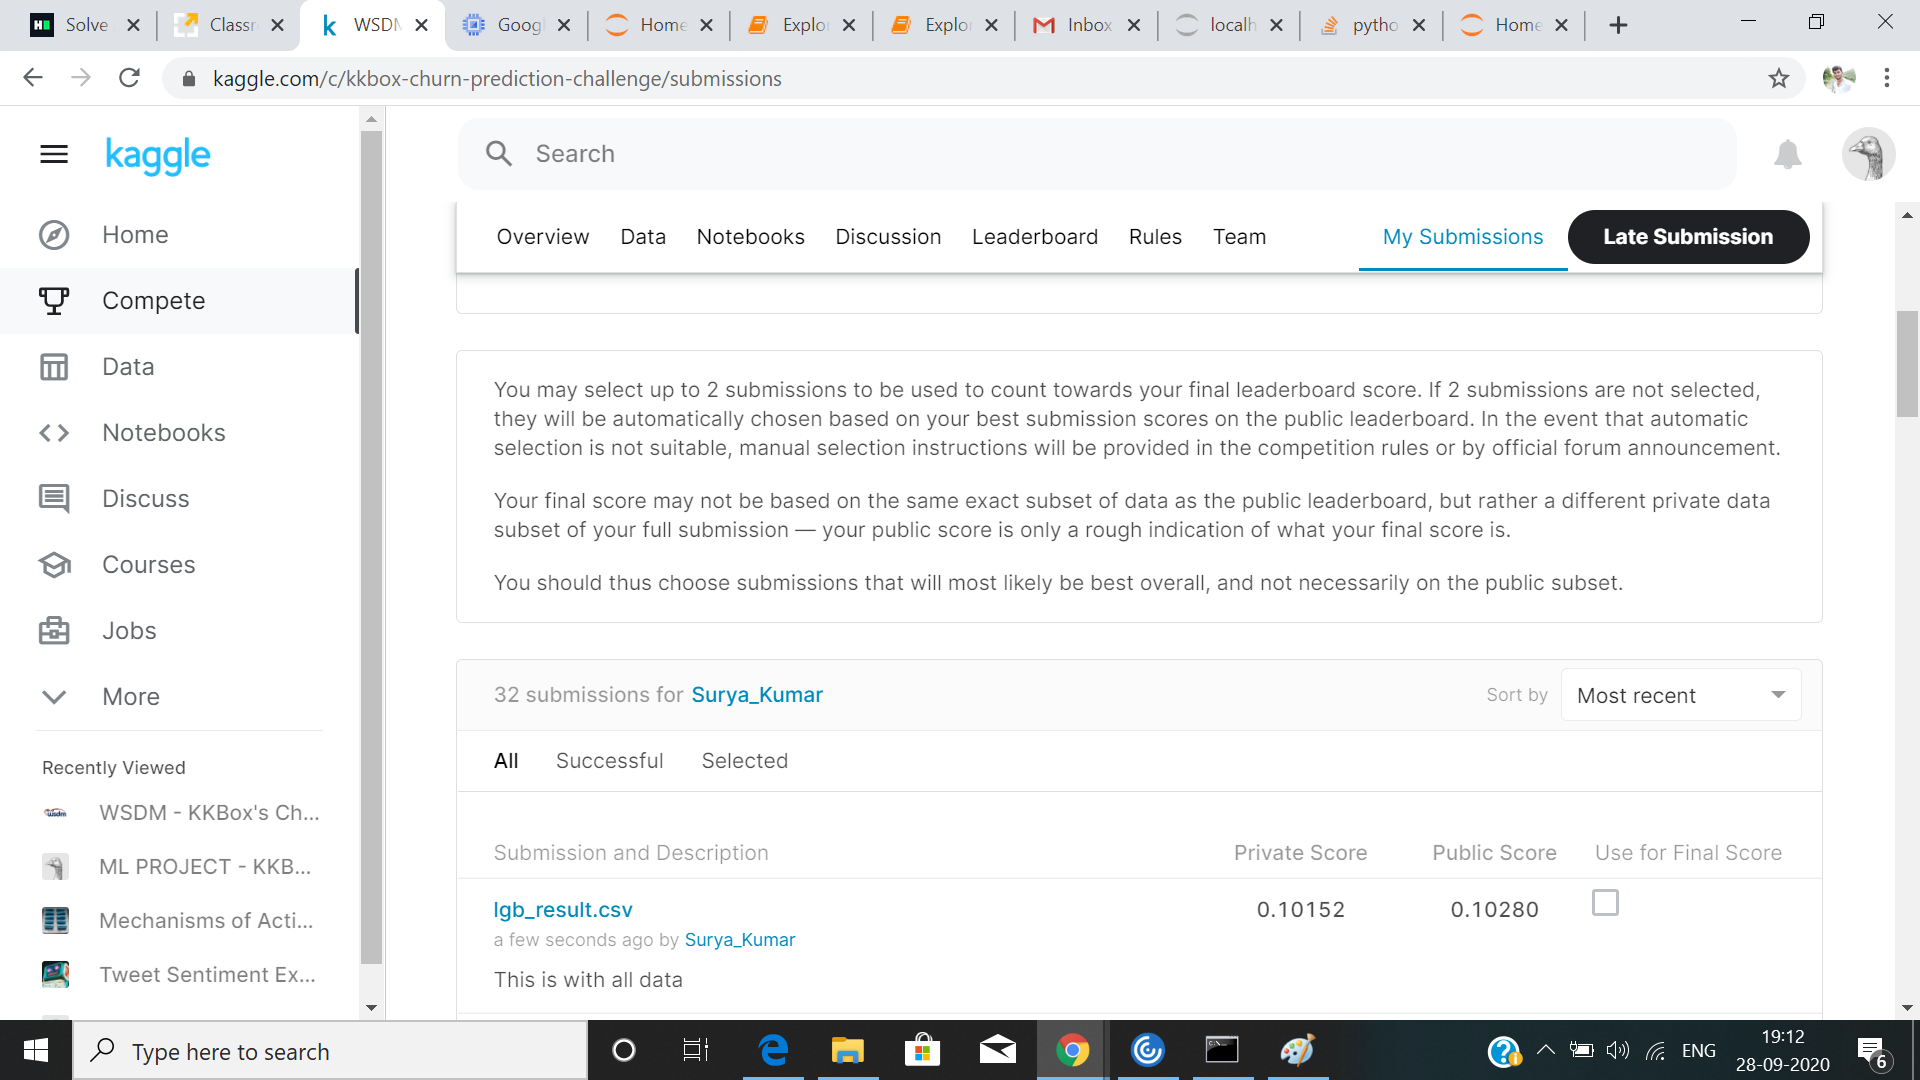

# Conclusion 
#### I tried lot of models and generated label with my script all gave very bad log loss that not even exists in leader board.
#### Finally generated label with scala given in kaggle and trained with features we had created then it works well
#### we were inplemented lot of features and ran diffrent models and submitted them in kaggle finally we choose it as it gave very good logloss.
#### Got 12 th place in private leader board and 11 th place in Public leader board and lies in 2-3rd percentile
